#Random Forest

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedShuffleSplit
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_csv('Healthdataset.csv')

In [ ]:
def clean_resume(resume_text):
    resume_text = re.sub('http\S+\s*', ' ', resume_text)  # remove URLs
    resume_text = re.sub('#\S+', '', resume_text)  # remove hashtags
    resume_text = re.sub('@\S+', '  ', resume_text)  # remove mentions
    resume_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resume_text)  # remove punctuations
    resume_text = re.sub(r'[^\x00-\x7f]', r' ', resume_text)
    resume_text = re.sub('\s+', ' ', resume_text)  # remove extra whitespace
    return resume_text.strip().lower()

df['cleaned_resume'] = df['Resume'].apply(clean_resume)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')


# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=6000, stop_words=stopwords.words('english'))
X = tfidf_vectorizer.fit_transform(df['cleaned_resume']).toarray()
y = df['Category'].values

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

In [ ]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


In [ ]:
param_grid = {
    'n_estimators': [100, 350],
    'max_depth': [45, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 4, 7]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [45, 50, 60],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [100, 350]})

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 45, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 350}


In [ ]:
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train, y_train)
y_pred = best_rf_classifier.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8444444444444444
Classification Report:
                                                          precision    recall  f1-score   support

                                   administrative intern       1.00      0.00      0.00         1
                                           administrator       1.00      1.00      1.00         1
                           audit and recovery specialist       1.00      1.00      1.00         1
                             certified nursing assistant       1.00      1.00      1.00         1
                               claims service specialist       1.00      1.00      1.00         1
                                       clinical reviewer       1.00      1.00      1.00         1
                            digital marketing specialist       1.00      1.00      1.00         1
                                                director       0.50      1.00      0.67         2
                                                engineer       1.

In [ ]:
# Assuming new_data is a pandas DataFrame containing the new resumes
new_data = pd.read_csv('Healthdataset.csv')  # Load the new data

# Preprocess the new resumes
new_resumes = new_data['Resume'].apply(clean_resume)

# Vectorize the new resumes using the same TF-IDF vectorizer used during training
X_new = tfidf_vectorizer.transform(new_resumes).toarray()

# Make predictions using the trained model
predicted_job_titles = best_rf_classifier.predict(X_new)

# Create a new DataFrame combining 'Category', 'cleaned_resume', and 'prediction'
output_df = pd.DataFrame({
    'Category': new_data['Category'],
    'cleaned_resume': new_resumes,
    'prediction': predicted_job_titles
})

# Display the output table with the desired format
print("Output Table:")
print(output_df)


Output Table:
                         Category  \
0              account executive    
1    operating room administrator   
2        administrative assistant   
3        administrative assistant   
4           administrative intern   
..                            ...   
219          system administrator   
220             teacher assistant   
221              machine operator   
222         healthcare consultant   
223                vice president   

                                        cleaned_resume  \
0    account executive summary extensive experience...   
1    admin operating room administrative coordinato...   
2    administrative assistant summary performance f...   
3    administrative assistant experience administra...   
4    healthcare administration intern professional ...   
..                                                 ...   
219  system administrator assistant supervisor prof...   
220  teacher assistant summary seeking a challengin...   
221  team leader ma

#1D CNN

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from sklearn.utils import shuffle
vocab_size = 6000

from sklearn.linear_model import LinearRegression
import joblib
import tensorflow as tf


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
def print_line():
    print(u'\u2550' * 50)

def print_add():
    print('+' * 50)

In [5]:
# Reading a Dataset
def readfunction():
    # reading a file
    resume = pd.read_csv('/content/Healthdataset.csv')
    print_line()
    print("File is read Sucessfully")
    print_add()
    print(resume.head())
    print_add()
    print_line()
    return resume



In [6]:
readfunction()

══════════════════════════════════════════════════
File is read Sucessfully
++++++++++++++++++++++++++++++++++++++++++++++++++
                       Category  \
0            account executive    
1  operating room administrator   
2      administrative assistant   
3      administrative assistant   
4         administrative intern   

                                              Resume  
0           ACCOUNT EXECUTIVE       Summary    Ex...  
1           ADMIN OPERATING ROOM ADMINISTRATIVE C...  
2           ADMINISTRATIVE ASSISTANT           Su...  
3           ADMINISTRATIVE ASSISTANT           Ex...  
4           HEALTHCARE ADMINISTRATION INTERN     ...  
++++++++++++++++++++++++++++++++++++++++++++++++++
══════════════════════════════════════════════════


Category  \
0              account executive    
1    operating room administrator   
2        administrative assistant   
3        administrative assistant   
4           administrative intern   
..                            ...   
219          system administrator   
220             teacher assistant   
221              machine operator   
222         healthcare consultant   
223                vice president   

                                                Resume  
0             ACCOUNT EXECUTIVE       Summary    Ex...  
1             ADMIN OPERATING ROOM ADMINISTRATIVE C...  
2             ADMINISTRATIVE ASSISTANT           Su...  
3             ADMINISTRATIVE ASSISTANT           Ex...  
4             HEALTHCARE ADMINISTRATION INTERN     ...  
..                                                 ...  
219           SYSTEM ADMINISTRATOR/ASSISTANT SUPERV...  
220           TEACHER ASSISTANT       Summary    Se...  
221           TEAM LEADER/ MACHINE OPERATOR       C...  
222           TECHNICAL IT HEALTHCARE CONSULTANT   ...  
223           VICE PRESIDENT-BUSINESS BANKING SALES...  

[224 rows x 2 columns]

In [7]:
# Data visulizatio , to understand about the dataset
def Visulization(df):
    print("DATA VISULIZATION: ")
    print()
    print("Shape of Data Frame: ",df.shape)# check shape
    print_add()
    print("To check For NULL Values: ")
    print(df.isna().sum())# To check wether it countains any null value
    print_add()
    print()
    print("To Check for any Duplicate value: ", df.duplicated().sum())# To check wether it countains any duplicagte value
    print()
    print(df.describe())
    print_add()
    print(df['Category'].value_counts())# Check Unique values
    print_add()
    print(sns.countplot(y="Category", data=df))

In [8]:
#pre-processing of data to remove special characters, hashtags, urls etc

def cleanResume(resumeText):

    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

def pre_processing(df):
    print("Before Pre-Processing")
    print_add()
    print(df['Resume'])
    print_line()
    df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))
    print("After Pre-Processing")
    print_add()
    print(df['cleaned_resume'])


In [9]:
# getting the most common word
def mostcommon_words(df):
    print_line()
    oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
    totalWords =[]
    Sentences = df['cleaned_resume'].values
    cleanedSentences = ""
    for i in range(len(df)):
        cleanedText = cleanResume(Sentences[i])
        cleanedSentences += cleanedText
        requiredWords = nltk.word_tokenize(cleanedText)
        for word in requiredWords:
            if word not in oneSetOfStopWords and word not in string.punctuation:
                totalWords.append(word)

    wordfreqdist = nltk.FreqDist(totalWords)
    mostcommon = wordfreqdist.most_common(50)
    print_add()
    print("Most common words: ")
    print()
    print(mostcommon)
    print_add()
    return cleanedSentences, wordfreqdist



In [10]:
#Visualising most common words with Wordcloud
def wordcloud(cleanedSentences):
    print_line()
    print("Visulization of most common word: ")
    wordcloud = WordCloud(background_color='black',width=1600,height=800,).generate(cleanedSentences)
    fig = plt.figure(figsize=(30,20))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    fig.savefig("tag.png")
    print_line()
    plt.show()


In [11]:
# Get features and labels from data and shuffle
def get_festures_Labels(df):
    print_line()
    print("Get features and labels from data: ")
    features = df['cleaned_resume'].values
    original_labels = df['Category'].values
    label = original_labels[:]

    for i in range(len(df)):
        label[i] = str(label[i])
        label[i] = str(label[i].lower())  # convert to lowercase
        label[i] = label[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens

    features, label = shuffle(features, label)
    print_add()
    print("Features: ")
    print()
    print(features[1])
    print_add()
    print("Label: ")
    print()
    print(label[1])
    print_line()
    return features, label



In [12]:
# Split into train and test
def spliting_data(df,features, label):
    print_line()
    print("Sliting data In process")
    train_split = 0.8
    train_size = int(train_split * len(df))

    train_features = features[:train_size]
    train_labels = label[:train_size]

    test_features = features[train_size:]
    test_labels = label[train_size:]
    print_add()
    print("Sliting data successfully completed")
    print("train_features, train_labels, test_features, test_labels suceffuly generated")
    print_line()
    return train_features, train_labels, test_features, test_labels



In [13]:
#tokenize features and labels

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

def tokenizing():
    # Tokenize feature data
    vocab_size = 6000
    oov_tok = '<>'
    print_line()
    print("Tokenize part has started")
    feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    feature_tokenizer.fit_on_texts(features)

    feature_index = feature_tokenizer.word_index

    train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)
    test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)
    print_add()
    print("Tokenize part has completed")
    print_line()
    return train_feature_sequences, test_feature_sequences, feature_tokenizer


In [14]:
# Tokenize label data
def Tokenize_label():
    label_tokenizer = Tokenizer(lower=True)
    label_tokenizer.fit_on_texts(label)

    label_index = label_tokenizer.word_index
    print(dict(list(label_index.items())))

    # Print example label encodings from train and test datasets
    train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)
    test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)
    print_line()
    return train_label_sequences, test_label_sequences, label_index



In [15]:
# Pad sequences for feature data
def pad_sequence(train_feature_sequences, test_feature_sequences):
    max_length = 350
    trunc_type = 'post'
    pad_type = 'post'

    train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
    test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
    # print(train_feature_padded[0])
    # print(test_feature_padded[0])
    return train_feature_padded, test_feature_padded



In [29]:
#CNN Model
import tensorflow as tf

def model_building():
    # Define the neural network
    vocab_size = 6000
    embedding_dim = 128
    max_seq_length = 350  # Set a suitable value for the maximum sequence length

    modeel = tf.keras.Sequential([
        #Embedding layer expecting input vocab of size 6000 and output embedding dimension of size 128 as set at the top
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_seq_length),

        #1D Convolutional layer with 64 filters and kernel size of 3
        tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),

        #MaxPooling layer with pool size 2 to reduce the spatial dimensions
        tf.keras.layers.MaxPooling1D(pool_size=2),

        #1D Convolutional layer with 128 filters and kernel size of 3
        tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),

        #MaxPooling layer with pool size 2 to further reduce the spatial dimensions
        tf.keras.layers.MaxPooling1D(pool_size=2),

        # Flatten the 3D output tensor from the convolutional layers to a 2D tensor
        tf.keras.layers.Flatten(),

        #Dense layer with 128 units and ReLU activation
        tf.keras.layers.Dense(128, activation='relu'),

        #Dense layer with 200 units and softmax activation for probability distribution
        tf.keras.layers.Dense(200, activation='softmax')
    ])
    return modeel


In [17]:
# Compile the model and convert train/test data into NumPy arrays
def optimization():
    model = model_building()
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model



In [18]:
def genetaing_trainig_dataset(train_feature_padded, test_feature_padded):
    # Features
    print("Generating Traing dataset")
    print_add()
    train_feature_padded = np.array(train_feature_padded)
    test_feature_padded = np.array(test_feature_padded)
    print("Sucessfully created")
    print("train_feature_padded, test_feature_padded")
    return train_feature_padded, test_feature_padded


def genetaing_validation_dataset(train_label_sequences, test_label_sequences):
    # Labels
    print_line()
    print("Validation dataset")
    print_add()
    train_label_sequences = np.array(train_label_sequences)
    test_label_sequences = np.array(test_label_sequences)
    print("Sucessfully created")
    print("train_label_sequences, test_label_sequences")
    print_line()
    return train_label_sequences, test_label_sequences





In [19]:
# Train the neural network
def model_compliation(train_feature_padded, test_feature_padded,train_label_sequences, test_label_sequences, model):
    print_line()
    print("Model compilation has started")
    num_epochs = 100

    history = model.fit(train_feature_padded, train_label_sequences,
                        epochs=num_epochs, validation_data=(test_feature_padded, test_label_sequences), verbose=2)
    return history



In [20]:
#determining test score and accuracy
def get_accuracy():
    print_line()
    score = model.evaluate(test_feature_padded, test_label_sequences, verbose=1)
    print_add()
    print("Test Score:", score[0])
    print("Test Accuracy:", score[1])
    print_line()



In [21]:
#Visualising the model accuracy and loss
def graphs(history):

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()



In [22]:
# let's create an array containing the previous three examples to predict and use our model to get predictions
def pridection():
    to_predict = [test_feature_padded[3],test_feature_padded[8],test_feature_padded[17]]
    predictions = model.predict(np.array(to_predict))
    class_labels = np.argmax(predictions, axis=1)
    print_add()
    keys = [key for i in class_labels for key, value in label_index.items() if i == value]
    print(keys)



══════════════════════════════════════════════════
File is read Sucessfully
++++++++++++++++++++++++++++++++++++++++++++++++++
                       Category  \
0            account executive    
1  operating room administrator   
2      administrative assistant   
3      administrative assistant   
4         administrative intern   

                                              Resume  
0           ACCOUNT EXECUTIVE       Summary    Ex...  
1           ADMIN OPERATING ROOM ADMINISTRATIVE C...  
2           ADMINISTRATIVE ASSISTANT           Su...  
3           ADMINISTRATIVE ASSISTANT           Ex...  
4           HEALTHCARE ADMINISTRATION INTERN     ...  
++++++++++++++++++++++++++++++++++++++++++++++++++
══════════════════════════════════════════════════
DATA VISULIZATION: 

Shape of Data Frame:  (224, 2)
++++++++++++++++++++++++++++++++++++++++++++++++++
To check For NULL Values: 
Category    0
Resume      0
dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++

To Chec

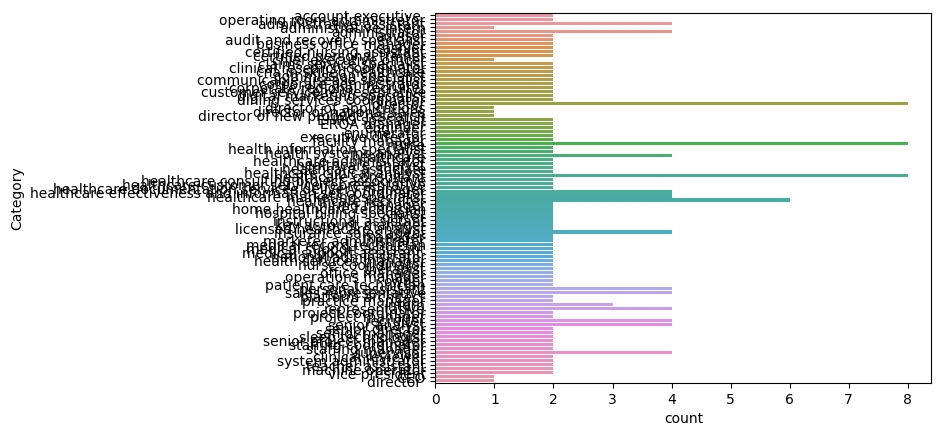

In [23]:
df = readfunction()
Visulization(df)

In [24]:
pre_processing(df)
cleanedSentences, wordfreqdist = mostcommon_words(df)

Before Pre-Processing
++++++++++++++++++++++++++++++++++++++++++++++++++
0               ACCOUNT EXECUTIVE       Summary    Ex...
1               ADMIN OPERATING ROOM ADMINISTRATIVE C...
2               ADMINISTRATIVE ASSISTANT           Su...
3               ADMINISTRATIVE ASSISTANT           Ex...
4               HEALTHCARE ADMINISTRATION INTERN     ...
                             ...                        
219             SYSTEM ADMINISTRATOR/ASSISTANT SUPERV...
220             TEACHER ASSISTANT       Summary    Se...
221             TEAM LEADER/ MACHINE OPERATOR       C...
222             TECHNICAL IT HEALTHCARE CONSULTANT   ...
223             VICE PRESIDENT-BUSINESS BANKING SALES...
Name: Resume, Length: 224, dtype: object
══════════════════════════════════════════════════
After Pre-Processing
++++++++++++++++++++++++++++++++++++++++++++++++++
0       ACCOUNT EXECUTIVE Summary Extensive experienc...
1       ADMIN OPERATING ROOM ADMINISTRATIVE COORDINAT...
2       ADMINISTRATIVE

══════════════════════════════════════════════════
Visulization of most common word: 
══════════════════════════════════════════════════


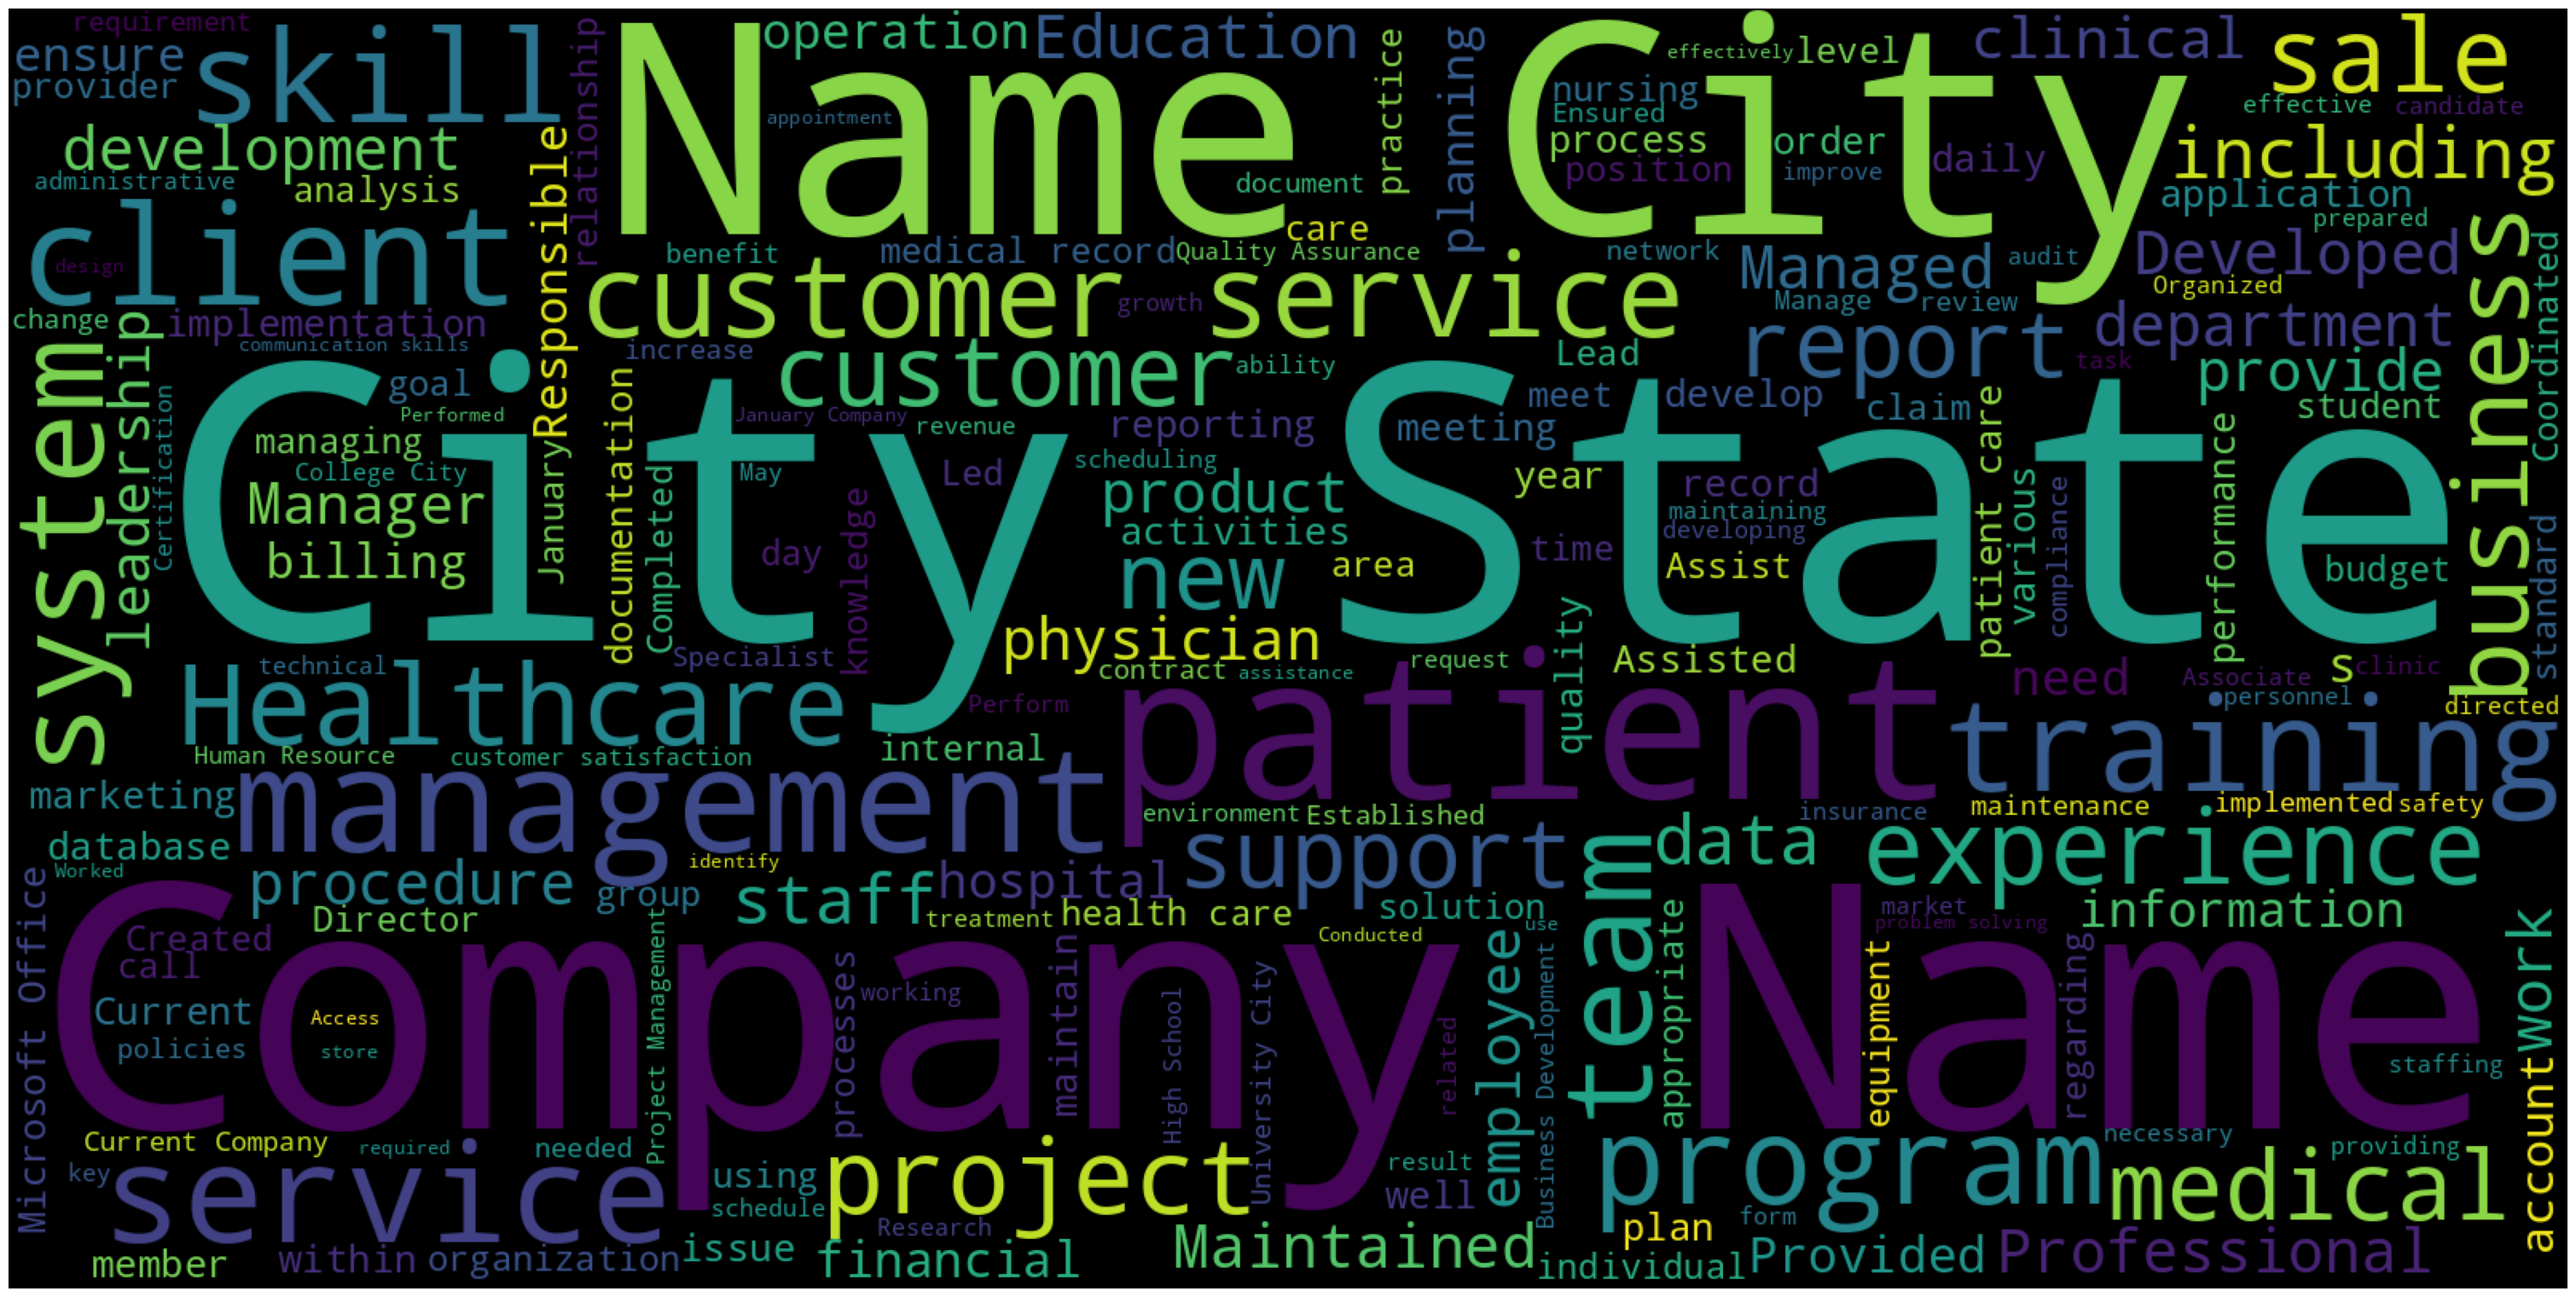

In [25]:
wordcloud(cleanedSentences)

In [30]:
features, label = get_festures_Labels(df)

══════════════════════════════════════════════════
Get features and labels from data: 
++++++++++++++++++++++++++++++++++++++++++++++++++
Features: 

 PRACTICE MANAGER Education and Training Certificate of Completion Health Information Technology Coding Certificate Program Rowan College of Burlington County City State MA Administrative Management Public Administration Administrative Management Public Administration BA Social Science Political Science Bowie State University Clarion University of Pennsylvania City State Social Science Political Science Skill Highlights Professional Summary Strategic healthcare professional with over 10 years in Operations Leadership Medical Practice Management Hospital Administration Behavioral Health and Medicare Services Core Qualifications Patient Centered Quality Home Population Health Management Medicare and Medicaid Services Regulatory Compliance Performance and Quality Improvement Electronic Health Records Reimbursement Methodologies ICD 10 CM ICD

In [31]:
train_features, train_labels, test_features, test_labels = spliting_data(df,features, label)
train_feature_sequences, test_feature_sequences, feature_tokenizer = tokenizing()
train_label_sequences, test_label_sequences, label_index = Tokenize_label()
train_feature_padded, test_feature_padded = pad_sequence(train_feature_sequences, test_feature_sequences)
train_feature_padded, test_feature_padded = genetaing_trainig_dataset(train_feature_padded, test_feature_padded)
train_label_sequences, test_label_sequences = genetaing_validation_dataset(train_label_sequences, test_label_sequences)

══════════════════════════════════════════════════
Sliting data In process
++++++++++++++++++++++++++++++++++++++++++++++++++
Sliting data successfully completed
train_features, train_labels, test_features, test_labels suceffuly generated
══════════════════════════════════════════════════
══════════════════════════════════════════════════
Tokenize part has started
++++++++++++++++++++++++++++++++++++++++++++++++++
Tokenize part has completed
══════════════════════════════════════════════════
{'director': 1, 'nurse': 2, 'healthcareconsultant': 3, 'healthcarerecruiter': 4, 'recruiter': 5, 'healthcaremarketingspecialist': 6, 'supervisor': 7, 'salesrepresentative': 8, 'senioranalyst': 9, 'administrativeassistant': 10, 'healthcareeffectivenessandinformationsetcoordinator': 11, 'healthcare': 12, 'medicalsupportassistant': 13, 'insurancesalesagent': 14, 'administrator': 15, 'representative': 16, 'personalassistant': 17, 'intern': 18, 'practicemanager': 19, 'corporateadministrator': 20, 'platf

In [32]:
model_building()
model = optimization()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 350, 128)          768000    
                                                                 
 conv1d_4 (Conv1D)           (None, 348, 64)           24640     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 174, 64)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 172, 128)          24704     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 86, 128)          0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 11008)            

In [33]:
history = model_compliation(train_feature_padded, test_feature_padded,train_label_sequences, test_label_sequences, model)


══════════════════════════════════════════════════
Model compilation has started
Epoch 1/100
6/6 - 4s - loss: 5.2602 - accuracy: 0.0000e+00 - val_loss: 5.1695 - val_accuracy: 0.0222 - 4s/epoch - 639ms/step
Epoch 2/100
6/6 - 1s - loss: 4.8931 - accuracy: 0.0056 - val_loss: 5.1070 - val_accuracy: 0.0222 - 1s/epoch - 202ms/step
Epoch 3/100
6/6 - 1s - loss: 4.4438 - accuracy: 0.0726 - val_loss: 4.9064 - val_accuracy: 0.0222 - 1s/epoch - 200ms/step
Epoch 4/100
6/6 - 1s - loss: 3.9277 - accuracy: 0.3128 - val_loss: 4.8327 - val_accuracy: 0.1556 - 860ms/epoch - 143ms/step
Epoch 5/100
6/6 - 1s - loss: 3.3500 - accuracy: 0.4022 - val_loss: 4.7996 - val_accuracy: 0.1111 - 677ms/epoch - 113ms/step
Epoch 6/100
6/6 - 1s - loss: 2.5421 - accuracy: 0.7318 - val_loss: 4.4209 - val_accuracy: 0.3333 - 712ms/epoch - 119ms/step
Epoch 7/100
6/6 - 1s - loss: 1.6431 - accuracy: 0.8771 - val_loss: 4.2016 - val_accuracy: 0.4667 - 708ms/epoch - 118ms/step
Epoch 8/100
6/6 - 1s - loss: 0.7877 - accuracy: 0.9330 -

══════════════════════════════════════════════════
2/2 [==============================] - 0s 28ms/step - loss: 3.6167 - accuracy: 0.6889
++++++++++++++++++++++++++++++++++++++++++++++++++
Test Score: 3.616678237915039
Test Accuracy: 0.6888889074325562
══════════════════════════════════════════════════


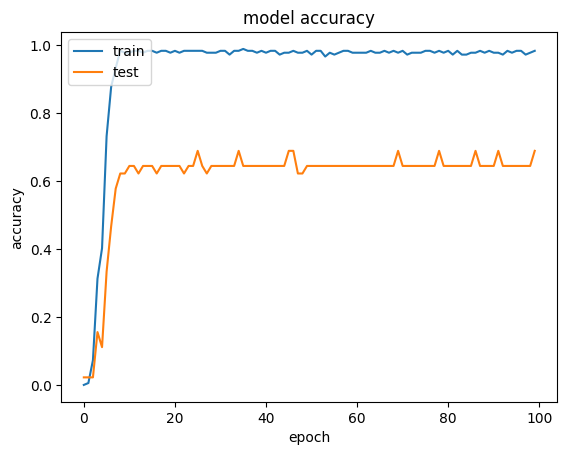

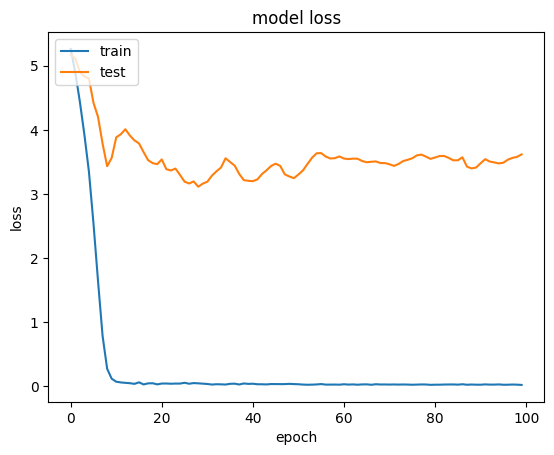

In [34]:
get_accuracy()
graphs(history)


In [35]:
pridection()

1/1 [==============================] - 0s 225ms/step
++++++++++++++++++++++++++++++++++++++++++++++++++
['director', 'seniormanager', 'clinicalreviewer']


In [36]:
# Save the trained model
model.save("data/modelCNN.h5")

In [37]:
model1 = tf.keras.models.load_model("data/model.h5")

In [38]:
to_predict = [test_feature_padded[3],test_feature_padded[8],test_feature_padded[17]]
predictions = model1.predict(np.array(to_predict))
class_labels = np.argmax(predictions, axis=1)
print_add()
keys = [key for i in class_labels for key, value in label_index.items() if i == value]
print(keys)

1/1 [==============================] - 0s 293ms/step
++++++++++++++++++++++++++++++++++++++++++++++++++
['director', 'seniormanager', 'clinicalreviewer']


In [39]:
test_data = pd.read_csv("/content/resumes_indeed_com-job_sample.csv", encoding='latin1')

In [40]:
test_data.shape

(10, 9)

In [41]:
test_data.head()

Uniq Id            Crawl Timestamp  \
0  3ddb29e616f31947053b257f327969d7  2019-02-20 08:47:25 +0000   
1  9138476c76bcbbefadedd4862966c3d2  2019-02-20 07:47:48 +0000   
2  cd1cafa706f917a627982bf47291b888  2019-02-20 07:37:41 +0000   
3  53aea69598c6c1084e4bce89f0494bc3  2019-02-20 08:20:06 +0000   
4  90f8f99d66ebc6c09fceee37aff14bc1  2019-02-20 08:35:33 +0000   

                                        Resume Title        Location  \
0  HEALTHCARE DOCUMENTATION SERVICES DELIVERY MAN...  New London, NH   
1  HEALTHCARE ADMINISTRATOR/OPERATIONAL AND STAFF...   Worcester, MA   
2   LICENSED UNITED HEALTHCARE INSURANCE SALES AGENT     Bristol, NH   
3   LICENSED UNITED HEALTHCARE INSURANCE SALES AGENT   Billerica, MA   
4  HEALTHCARE EFFECTIVENESS AND INFORMATION SET C...   Worcester, MA   

                                        Introduction  \
0  A dependable and motivated professional experi...   
1  Experienced, dependable and motivated IT Techn...   
2                                                NaN   
3  To obtain full time employment in the field of...   
4                                                NaN   

                                     Work Experience  \
0  Sales Manager-MadgeTech, Inc-August 2015 to Fe...   
1  Implementation Engineer-Versatile Communicatio...   
2  Education Information Dissemination Coordinato...   
3  Engineering Department Intern-Town of Billeric...   
4  Pack and Ship/SORT Technician-Intel Corporatio...   

                                           Education  \
0  Rowland High School   City  ,   State        H...   
1  --ShoreTel University-Austin, TX|Master-PC & N...   
2     Bachelor's-Management-Regis College-Weston, MA   
3  Bachelor of Science-Civil and Environmental En...   
4  BS-Information Technology-University of Massac...   

                                              Skills  \
0  120 months-CRM,72 months-Contract Negotiation,...   
1  15 months-CISCO,12 months-FIBER OPTIC,6 months...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                              Additional Information  
0  â¢    Well-Developed Sales & Business Acumen ...  
1  TECHNICAL SKILLS\n\nHardware: Switches, Router...  
2                                                NaN  
3  â¢ Bachelors of Science in Civil and Environm...  
4  Engineering Technician/Planning Analyst/Operat...

In [42]:
test_data = test_data.drop(test_data.columns[:2], axis=1)
test_data = test_data.drop(test_data.columns[7:], axis=1)
test_data['merged_col'] = test_data.iloc[:, 1:7].apply(lambda x: "\n".join(x.dropna().astype(str)), axis=1)

In [43]:
test_data.columns

Index(['Resume Title', 'Location', 'Introduction', 'Work Experience',
       'Education', 'Skills', 'Additional Information', 'merged_col'],
      dtype='object')

In [44]:
test_data.iloc[0,:]

Resume Title              HEALTHCARE DOCUMENTATION SERVICES DELIVERY MAN...
Location                                                     New London, NH
Introduction              A dependable and motivated professional experi...
Work Experience           Sales Manager-MadgeTech, Inc-August 2015 to Fe...
Education                 Rowland High School   City  ,   State        H...
Skills                    120 months-CRM,72 months-Contract Negotiation,...
Additional Information    â¢    Well-Developed Sales & Business Acumen ...
merged_col                New London, NH\nA dependable and motivated pro...
Name: 0, dtype: object

In [45]:
print(test_data.iloc[0,7])

New London, NH
A dependable and motivated professional experienced in managing multiple projects in a fast paced deadline driven environment. Posses strong organizational and communication skills. Strong technical proficiency that includes: working knowledge of Microsoft Office Word, Excel, Access and Outlook with the ability to quickly learn new technology and software applications. Works well independently with the ability to prioritize and multi-task efficiently with minimal  supervision
Sales Manager-MadgeTech, Inc-August 2015 to February 2017-Warner, NH-â¢       Built and Directed inside sales team offering solution-based data logging hardware, software, and services to customers across multiple vertical markets

â¢       Directed personnel in support of global channel partner network

â¢       15% Sales Growth from 2015 to 2017: $8.5M to $9.7M (Combined channel and direct)

â¢       Managed expansive product portfolio

â¢       Developed, implemented, and tracked strategic s

In [46]:
new_test = test_data.loc[:,['Resume Title', 'merged_col']]

In [47]:
new_test.head()

Resume Title  \
0  HEALTHCARE DOCUMENTATION SERVICES DELIVERY MAN...   
1  HEALTHCARE ADMINISTRATOR/OPERATIONAL AND STAFF...   
2   LICENSED UNITED HEALTHCARE INSURANCE SALES AGENT   
3   LICENSED UNITED HEALTHCARE INSURANCE SALES AGENT   
4  HEALTHCARE EFFECTIVENESS AND INFORMATION SET C...   

                                          merged_col  
0  New London, NH\nA dependable and motivated pro...  
1  Worcester, MA\nExperienced, dependable and mot...  
2  Bristol, NH\nEducation Information Disseminati...  
3  Billerica, MA\nTo obtain full time employment ...  
4  Worcester, MA\nPack and Ship/SORT Technician-I...

In [48]:
new_test['cleaned_resume'] = new_test.merged_col.apply(lambda x: cleanResume(x))
new_test.head()

Resume Title  \
0  HEALTHCARE DOCUMENTATION SERVICES DELIVERY MAN...   
1  HEALTHCARE ADMINISTRATOR/OPERATIONAL AND STAFF...   
2   LICENSED UNITED HEALTHCARE INSURANCE SALES AGENT   
3   LICENSED UNITED HEALTHCARE INSURANCE SALES AGENT   
4  HEALTHCARE EFFECTIVENESS AND INFORMATION SET C...   

                                          merged_col  \
0  New London, NH\nA dependable and motivated pro...   
1  Worcester, MA\nExperienced, dependable and mot...   
2  Bristol, NH\nEducation Information Disseminati...   
3  Billerica, MA\nTo obtain full time employment ...   
4  Worcester, MA\nPack and Ship/SORT Technician-I...   

                                      cleaned_resume  
0  New London NH A dependable and motivated profe...  
1  Worcester MA Experienced dependable and motiva...  
2  Bristol NH Education Information Dissemination...  
3  Billerica MA To obtain full time employment in...  
4  Worcester MA Pack and Ship SORT Technician Int...

In [49]:
cleaned_sent, word_freq = mostcommon_words(new_test)

══════════════════════════════════════════════════
++++++++++++++++++++++++++++++++++++++++++++++++++
Most common words: 

[('months', 43), ('MA', 25), ('management', 23), ('NH', 22), ('customer', 20), ('new', 19), ('January', 19), ('support', 16), ('Engineering', 16), ('customers', 15), ('Management', 15), ('business', 15), ('software', 14), ('sales', 14), ('marketing', 14), ('test', 14), ('Manager', 13), ('2015', 13), ('development', 13), ('service', 13), ('communication', 12), ('Office', 12), ('data', 12), ('process', 12), ('June', 12), ('2013', 12), ('Maintained', 12), ('team', 11), ('Team', 11), ('Created', 11), ('IT', 11), ('Systems', 11), ('including', 11), ('using', 11), ('skills', 10), ('Sales', 10), ('product', 10), ('monthly', 10), ('2011', 10), ('2016', 10), ('plan', 10), ('May', 10), ('24', 10), ('2017', 9), ('Provided', 9), ('Technical', 9), ('Performed', 9), ('Corporation', 9), ('School', 9), ('Technician', 9)]
++++++++++++++++++++++++++++++++++++++++++++++++++


In [50]:
new_test.rename(columns={'Resume Title': 'Category'}, inplace = True)

══════════════════════════════════════════════════
Visulization of most common word: 
══════════════════════════════════════════════════


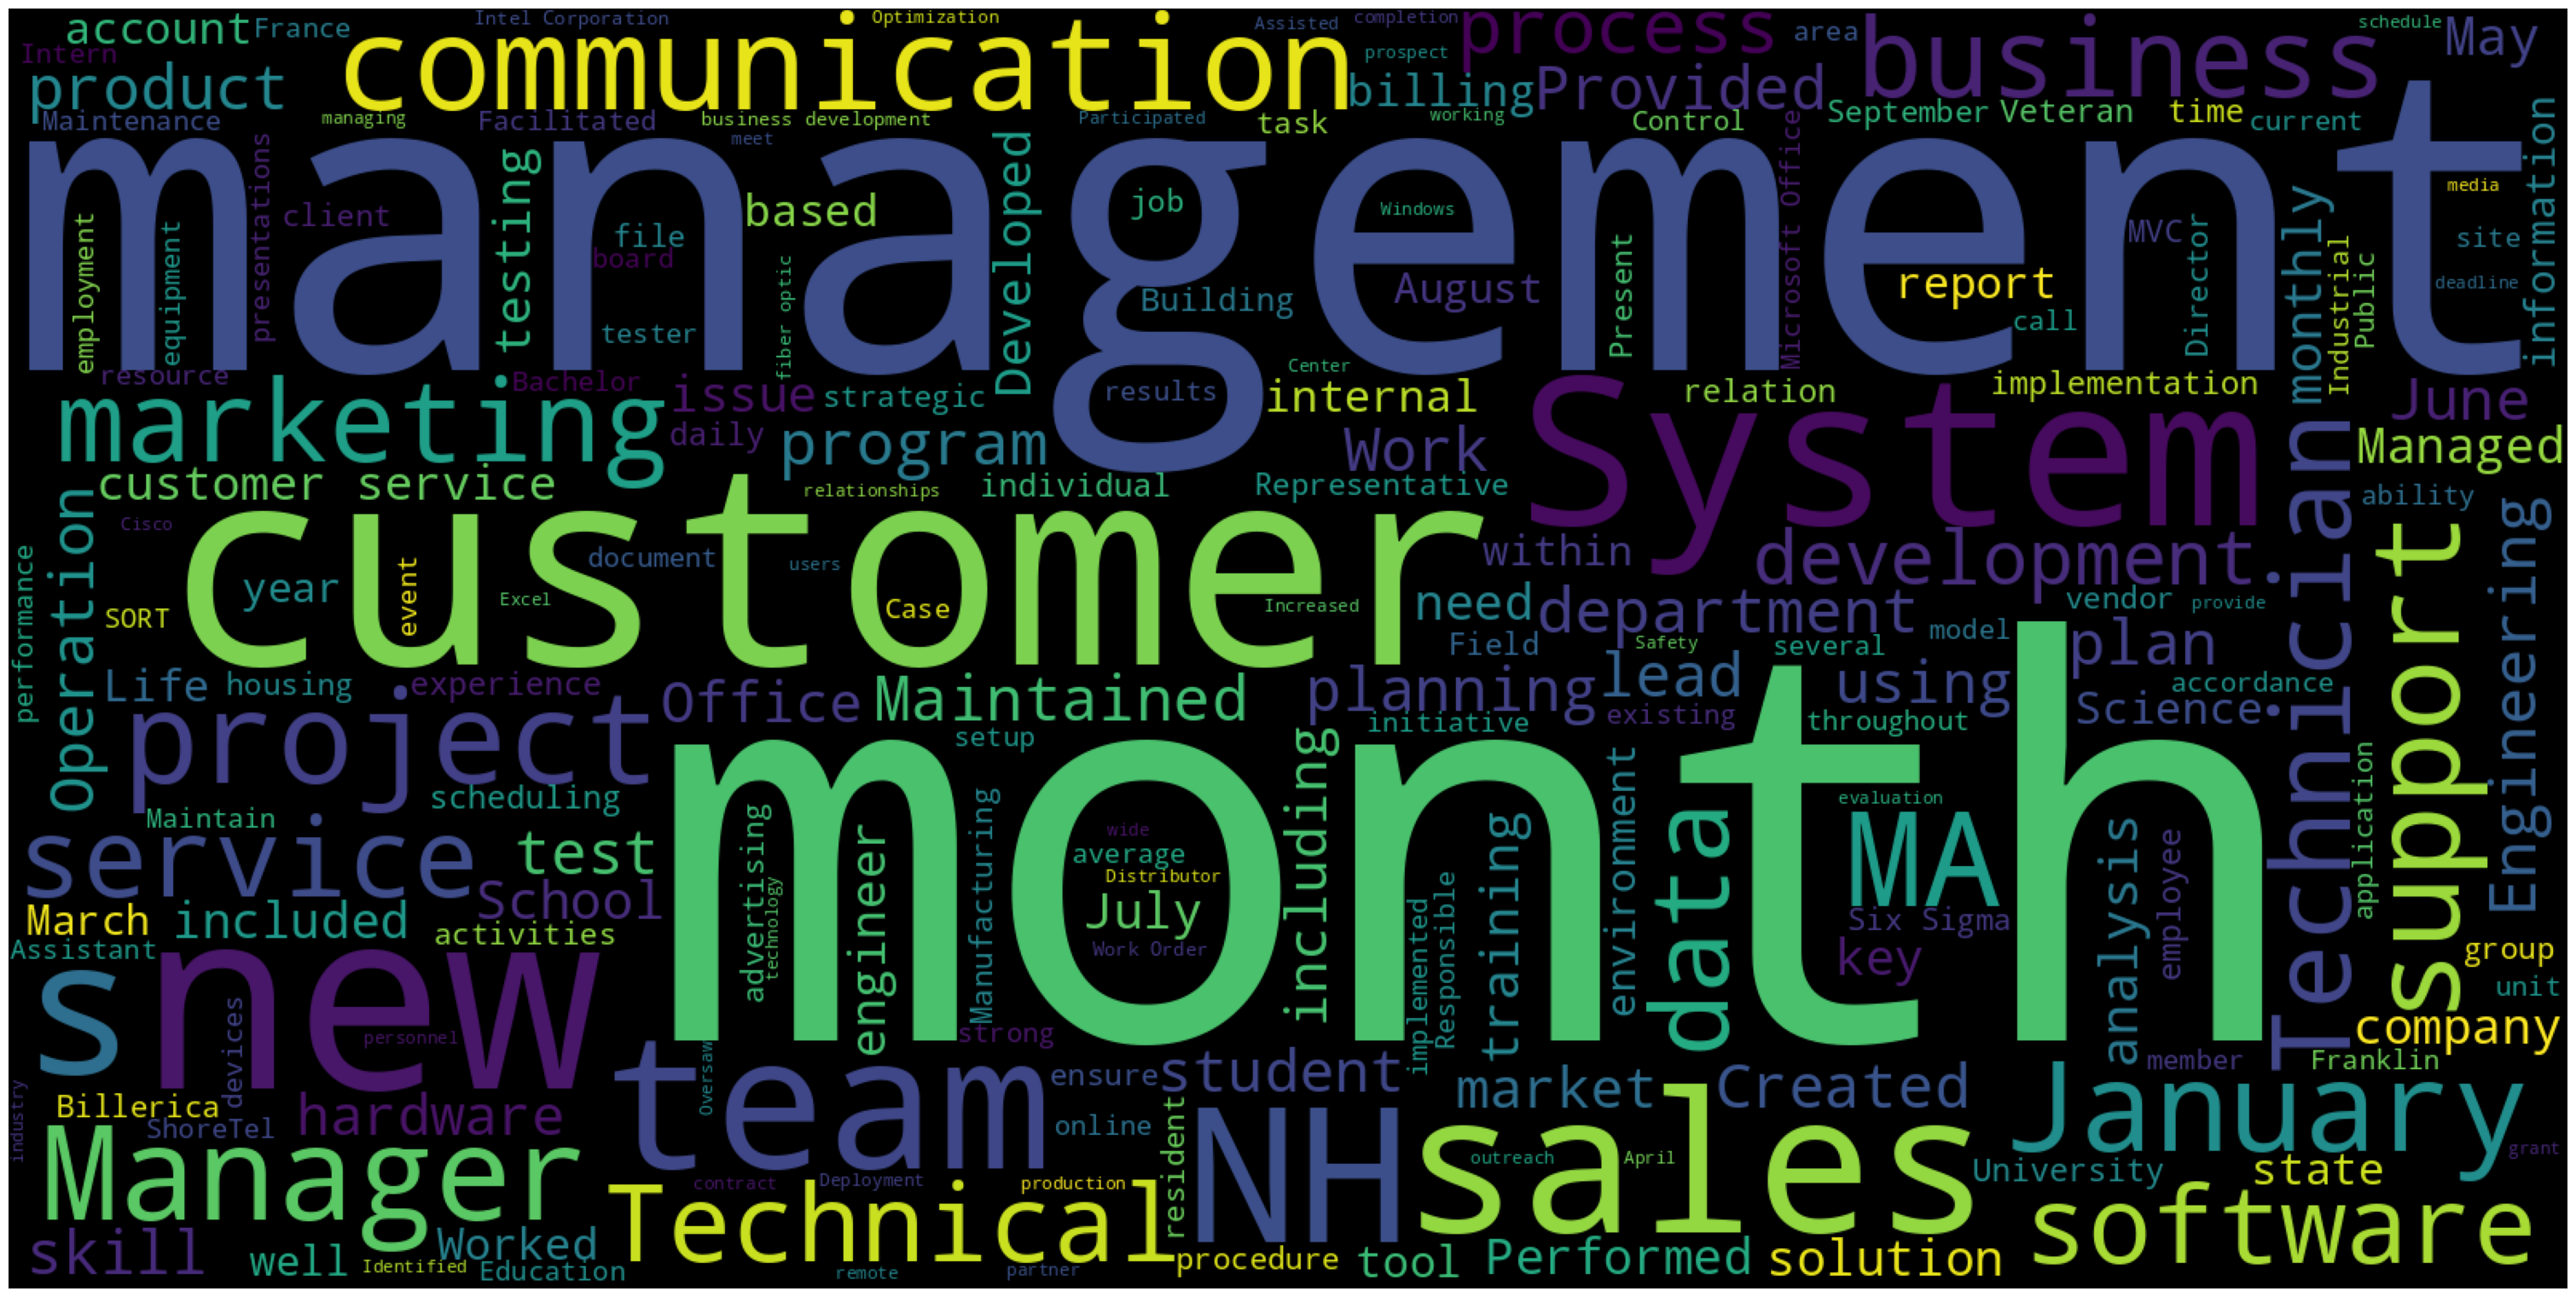

In [51]:
wordcloud(cleaned_sent)

In [52]:
features, label = get_festures_Labels(new_test)

══════════════════════════════════════════════════
Get features and labels from data: 
++++++++++++++++++++++++++++++++++++++++++++++++++
Features: 

Plymouth MA High energy hardworking Engineering graduate with sales and mechanical experience and dedicated focus in advancing a career in sales and business development Technical Customer Service SmartCo Services LLC August 2017 to September 2017 Taunton MA Bi Lingual Customer service representative in the support department for Quebec and other territories Promoting and supporting the PartsEye Software to Parts manager at Automobile dealerships Troubleshooting technical issues as they arise Providing assistance to our Automotive Parts Planners Assisting in activating new dealership customers Performing various analytical tasks Analyzing data and comparing inventories Was obligated to resign with management approval due to transportation issue International Sales Representative Thomas C Wilson LLC March 2015 to May 2017 Long Island NY Ac

In [53]:
test_features, test_labels = features, label

In [54]:
test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)

In [57]:
max_length = 350
trunc_type = 'post'
pad_type = 'post'

test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = np.array(test_feature_padded)


In [58]:
predictions = model.predict(test_feature_padded)

1/1 [==============================] - 0s 32ms/step


In [59]:
class_labels = np.argmax(predictions, axis=1)

In [60]:
keys = [key for i in class_labels for key, value in label_index.items() if i == value]

In [61]:
len(keys)

10

In [62]:
new_test.head()

Category  \
0     healthcaredocumentationservicesdeliverymanager   
1   healthcareadministrator/operationalandstaffreorg   
2        licensedunitedhealthcareinsurancesalesagent   
3        licensedunitedhealthcareinsurancesalesagent   
4  healthcareeffectivenessandinformationsetcoordi...   

                                          merged_col  \
0  New London, NH\nA dependable and motivated pro...   
1  Worcester, MA\nExperienced, dependable and mot...   
2  Bristol, NH\nEducation Information Disseminati...   
3  Billerica, MA\nTo obtain full time employment ...   
4  Worcester, MA\nPack and Ship/SORT Technician-I...   

                                      cleaned_resume  
0  New London NH A dependable and motivated profe...  
1  Worcester MA Experienced dependable and motiva...  
2  Bristol NH Education Information Dissemination...  
3  Billerica MA To obtain full time employment in...  
4  Worcester MA Pack and Ship SORT Technician Int...

In [63]:
new_test["prediction"] = keys

In [64]:
new_test.head(25)

Category  \
0     healthcaredocumentationservicesdeliverymanager   
1   healthcareadministrator/operationalandstaffreorg   
2        licensedunitedhealthcareinsurancesalesagent   
3        licensedunitedhealthcareinsurancesalesagent   
4  healthcareeffectivenessandinformationsetcoordi...   
5  healthcareeffectivenessandinformationsetcoordi...   
6            systemadministrator/assistantsupervisor   
7               emergencyroomqualityassurancemanager   
8              senioranalystdataqualityandgovernance   
9       electronichealthrecordoptimizationspecialist   

                                          merged_col  \
0  New London, NH\nA dependable and motivated pro...   
1  Worcester, MA\nExperienced, dependable and mot...   
2  Bristol, NH\nEducation Information Disseminati...   
3  Billerica, MA\nTo obtain full time employment ...   
4  Worcester, MA\nPack and Ship/SORT Technician-I...   
5  Springfield, MA\nBDC Data Analyst-Gary Rome Au...   
6  Boston, MA\nSafety Engineer Intern-Hexagon Man...   
7  Allenstown, NH\nTo utilize experience and pers...   
8  Pembroke, NH\nASSISTANT PROGRAM MANAGER-HARBOR...   
9  Plymouth, MA\nHigh energy, hardworking Enginee...   

                                      cleaned_resume prediction  
0  New London NH A dependable and motivated profe...   director  
1  Worcester MA Experienced dependable and motiva...   director  
2  Bristol NH Education Information Dissemination...   director  
3  Billerica MA To obtain full time employment in...   director  
4  Worcester MA Pack and Ship SORT Technician Int...   director  
5  Springfield MA BDC Data Analyst Gary Rome Auto...    advisor  
6  Boston MA Safety Engineer Intern Hexagon Manuf...   director  
7  Allenstown NH To utilize experience and person...   director  
8  Pembroke NH ASSISTANT PROGRAM MANAGER HARBOR H...    advisor  
9  Plymouth MA High energy hardworking Engineerin...   director

#LSTM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from sklearn.utils import shuffle
vocab_size = 6000

from sklearn.linear_model import LinearRegression
import joblib
import tensorflow as tf


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def print_line():
    print(u'\u2550' * 50)

def print_add():
    print('+' * 50)

In [ ]:
# Reading a Dataset
def readfunction():
    # reading a file
    resume = pd.read_csv('/content/Healthdataset.csv')
    print_line()
    print("File is read Sucessfully")
    print_add()
    print(resume.head())
    print_add()
    print_line()
    return resume



In [ ]:
readfunction()

══════════════════════════════════════════════════
File is read Sucessfully
++++++++++++++++++++++++++++++++++++++++++++++++++
                       Category  \
0            account executive    
1  operating room administrator   
2      administrative assistant   
3      administrative assistant   
4         administrative intern   

                                              Resume  
0           ACCOUNT EXECUTIVE       Summary    Ex...  
1           ADMIN OPERATING ROOM ADMINISTRATIVE C...  
2           ADMINISTRATIVE ASSISTANT           Su...  
3           ADMINISTRATIVE ASSISTANT           Ex...  
4           HEALTHCARE ADMINISTRATION INTERN     ...  
++++++++++++++++++++++++++++++++++++++++++++++++++
══════════════════════════════════════════════════


Category  \
0              account executive    
1    operating room administrator   
2        administrative assistant   
3        administrative assistant   
4           administrative intern   
..                            ...   
219          system administrator   
220             teacher assistant   
221              machine operator   
222         healthcare consultant   
223                vice president   

                                                Resume  
0             ACCOUNT EXECUTIVE       Summary    Ex...  
1             ADMIN OPERATING ROOM ADMINISTRATIVE C...  
2             ADMINISTRATIVE ASSISTANT           Su...  
3             ADMINISTRATIVE ASSISTANT           Ex...  
4             HEALTHCARE ADMINISTRATION INTERN     ...  
..                                                 ...  
219           SYSTEM ADMINISTRATOR/ASSISTANT SUPERV...  
220           TEACHER ASSISTANT       Summary    Se...  
221           TEAM LEADER/ MACHINE OPERATOR       C...  
222           TECHNICAL IT HEALTHCARE CONSULTANT   ...  
223           VICE PRESIDENT-BUSINESS BANKING SALES...  

[224 rows x 2 columns]

In [ ]:
# Data visulizatio , to understand about the dataset
def Visulization(df):
    print("DATA VISULIZATION: ")
    print()
    print("Shape of Data Frame: ",df.shape)# check shape
    print_add()
    print("To check For NULL Values: ")
    print(df.isna().sum())# To check wether it countains any null value
    print_add()
    print()
    print("To Check for any Duplicate value: ", df.duplicated().sum())# To check wether it countains any duplicagte value
    print()
    print(df.describe())
    print_add()
    print(df['Category'].value_counts())# Check Unique values
    print_add()
    print(sns.countplot(y="Category", data=df))

In [ ]:
#pre-processing of data to remove special characters, hashtags, urls etc

def cleanResume(resumeText):

    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

def pre_processing(df):
    print("Before Pre-Processing")
    print_add()
    print(df['Resume'])
    print_line()
    df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))
    print("After Pre-Processing")
    print_add()
    print(df['cleaned_resume'])


In [ ]:
# getting the most common word
def mostcommon_words(df):
    print_line()
    oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
    totalWords =[]
    Sentences = df['cleaned_resume'].values
    cleanedSentences = ""
    for i in range(len(df)):
        cleanedText = cleanResume(Sentences[i])
        cleanedSentences += cleanedText
        requiredWords = nltk.word_tokenize(cleanedText)
        for word in requiredWords:
            if word not in oneSetOfStopWords and word not in string.punctuation:
                totalWords.append(word)

    wordfreqdist = nltk.FreqDist(totalWords)
    mostcommon = wordfreqdist.most_common(50)
    print_add()
    print("Most common words: ")
    print()
    print(mostcommon)
    print_add()
    return cleanedSentences, wordfreqdist



In [ ]:
#Visualising most common words with Wordcloud
def wordcloud(cleanedSentences):
    print_line()
    print("Visulization of most common word: ")
    wordcloud = WordCloud(background_color='black',width=1600,height=800,).generate(cleanedSentences)
    fig = plt.figure(figsize=(30,20))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    fig.savefig("tag.png")
    print_line()
    plt.show()


In [ ]:
# Get features and labels from data and shuffle
def get_festures_Labels(df):
    print_line()
    print("Get features and labels from data: ")
    features = df['cleaned_resume'].values
    original_labels = df['Category'].values
    label = original_labels[:]

    for i in range(len(df)):
        label[i] = str(label[i])
        label[i] = str(label[i].lower())  # convert to lowercase
        label[i] = label[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens

    features, label = shuffle(features, label)
    print_add()
    print("Features: ")
    print()
    print(features[1])
    print_add()
    print("Label: ")
    print()
    print(label[1])
    print_line()
    return features, label



In [ ]:
# Split into train and test
def spliting_data(df,features, label):
    print_line()
    print("Sliting data In process")
    train_split = 0.8
    train_size = int(train_split * len(df))

    train_features = features[:train_size]
    train_labels = label[:train_size]

    test_features = features[train_size:]
    test_labels = label[train_size:]
    print_add()
    print("Sliting data successfully completed")
    print("train_features, train_labels, test_features, test_labels suceffuly generated")
    print_line()
    return train_features, train_labels, test_features, test_labels



In [ ]:
#tokenize features and labels

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

def tokenizing():
    # Tokenize feature data
    vocab_size = 6000
    oov_tok = '<>'
    print_line()
    print("Tokenize part has started")
    feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    feature_tokenizer.fit_on_texts(features)

    feature_index = feature_tokenizer.word_index

    train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)
    test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)
    print_add()
    print("Tokenize part has completed")
    print_line()
    return train_feature_sequences, test_feature_sequences, feature_tokenizer


In [ ]:
# Tokenize label data
def Tokenize_label():
    label_tokenizer = Tokenizer(lower=True)
    label_tokenizer.fit_on_texts(label)

    label_index = label_tokenizer.word_index
    print(dict(list(label_index.items())))

    # Print example label encodings from train and test datasets
    train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)
    test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)
    print_line()
    return train_label_sequences, test_label_sequences, label_index



In [ ]:
# Pad sequences for feature data
def pad_sequence(train_feature_sequences, test_feature_sequences):
    max_length = 350
    trunc_type = 'post'
    pad_type = 'post'

    train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
    test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
    # print(train_feature_padded[0])
    # print(test_feature_padded[0])
    return train_feature_padded, test_feature_padded



In [ ]:
#Train a sequential model
def model_building():
    # Define the neural network
    embedding_dim = 128

    modeel = tf.keras.Sequential([
      # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
      #tf.keras.layers.Dense(embedding_dim, activation='relu'),

      # use ReLU in place of tanh function since they are very good alternatives of each other.
      tf.keras.layers.Dense(embedding_dim, activation='relu'),

      # Add a Dense layer with 25 units and softmax activation for probability distribution
      tf.keras.layers.Dense(200, activation='softmax')])
    return modeel




In [ ]:
# Compile the model and convert train/test data into NumPy arrays
def optimization():
    model = model_building()
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model



In [ ]:
def genetaing_trainig_dataset(train_feature_padded, test_feature_padded):
    # Features
    print("Generating Traing dataset")
    print_add()
    train_feature_padded = np.array(train_feature_padded)
    test_feature_padded = np.array(test_feature_padded)
    print("Sucessfully created")
    print("train_feature_padded, test_feature_padded")
    return train_feature_padded, test_feature_padded


def genetaing_validation_dataset(train_label_sequences, test_label_sequences):
    # Labels
    print_line()
    print("Validation dataset")
    print_add()
    train_label_sequences = np.array(train_label_sequences)
    test_label_sequences = np.array(test_label_sequences)
    print("Sucessfully created")
    print("train_label_sequences, test_label_sequences")
    print_line()
    return train_label_sequences, test_label_sequences





In [ ]:
# Train the neural network
def model_compliation(train_feature_padded, test_feature_padded,train_label_sequences, test_label_sequences, model):
    print_line()
    print("Model compilation has started")
    num_epochs = 100

    history = model.fit(train_feature_padded, train_label_sequences,
                        epochs=num_epochs, validation_data=(test_feature_padded, test_label_sequences), verbose=2)
    return history



In [ ]:
#determining test score and accuracy
def get_accuracy():
    print_line()
    score = model.evaluate(test_feature_padded, test_label_sequences, verbose=1)
    print_add()
    print("Test Score:", score[0])
    print("Test Accuracy:", score[1])
    print_line()



In [ ]:
#Visualising the model accuracy and loss
def graphs(history):

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()



In [ ]:
# let's create an array containing the previous three examples to predict and use our model to get predictions
def pridection():
    to_predict = [test_feature_padded[3],test_feature_padded[8],test_feature_padded[17]]
    predictions = model.predict(np.array(to_predict))
    class_labels = np.argmax(predictions, axis=1)
    print_add()
    keys = [key for i in class_labels for key, value in label_index.items() if i == value]
    print(keys)



══════════════════════════════════════════════════
File is read Sucessfully
++++++++++++++++++++++++++++++++++++++++++++++++++
                       Category  \
0            account executive    
1  operating room administrator   
2      administrative assistant   
3      administrative assistant   
4         administrative intern   

                                              Resume  
0           ACCOUNT EXECUTIVE       Summary    Ex...  
1           ADMIN OPERATING ROOM ADMINISTRATIVE C...  
2           ADMINISTRATIVE ASSISTANT           Su...  
3           ADMINISTRATIVE ASSISTANT           Ex...  
4           HEALTHCARE ADMINISTRATION INTERN     ...  
++++++++++++++++++++++++++++++++++++++++++++++++++
══════════════════════════════════════════════════
DATA VISULIZATION: 

Shape of Data Frame:  (224, 2)
++++++++++++++++++++++++++++++++++++++++++++++++++
To check For NULL Values: 
Category    0
Resume      0
dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++

To Chec

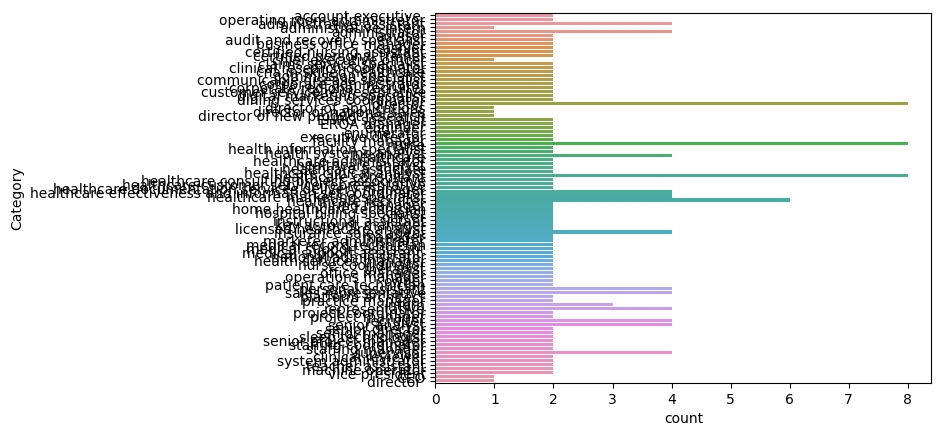

In [ ]:
df = readfunction()
Visulization(df)

In [ ]:
pre_processing(df)
cleanedSentences, wordfreqdist = mostcommon_words(df)

Before Pre-Processing
++++++++++++++++++++++++++++++++++++++++++++++++++
0               ACCOUNT EXECUTIVE       Summary    Ex...
1               ADMIN OPERATING ROOM ADMINISTRATIVE C...
2               ADMINISTRATIVE ASSISTANT           Su...
3               ADMINISTRATIVE ASSISTANT           Ex...
4               HEALTHCARE ADMINISTRATION INTERN     ...
                             ...                        
219             SYSTEM ADMINISTRATOR/ASSISTANT SUPERV...
220             TEACHER ASSISTANT       Summary    Se...
221             TEAM LEADER/ MACHINE OPERATOR       C...
222             TECHNICAL IT HEALTHCARE CONSULTANT   ...
223             VICE PRESIDENT-BUSINESS BANKING SALES...
Name: Resume, Length: 224, dtype: object
══════════════════════════════════════════════════
After Pre-Processing
++++++++++++++++++++++++++++++++++++++++++++++++++
0       ACCOUNT EXECUTIVE Summary Extensive experienc...
1       ADMIN OPERATING ROOM ADMINISTRATIVE COORDINAT...
2       ADMINISTRATIVE

══════════════════════════════════════════════════
Visulization of most common word: 
══════════════════════════════════════════════════


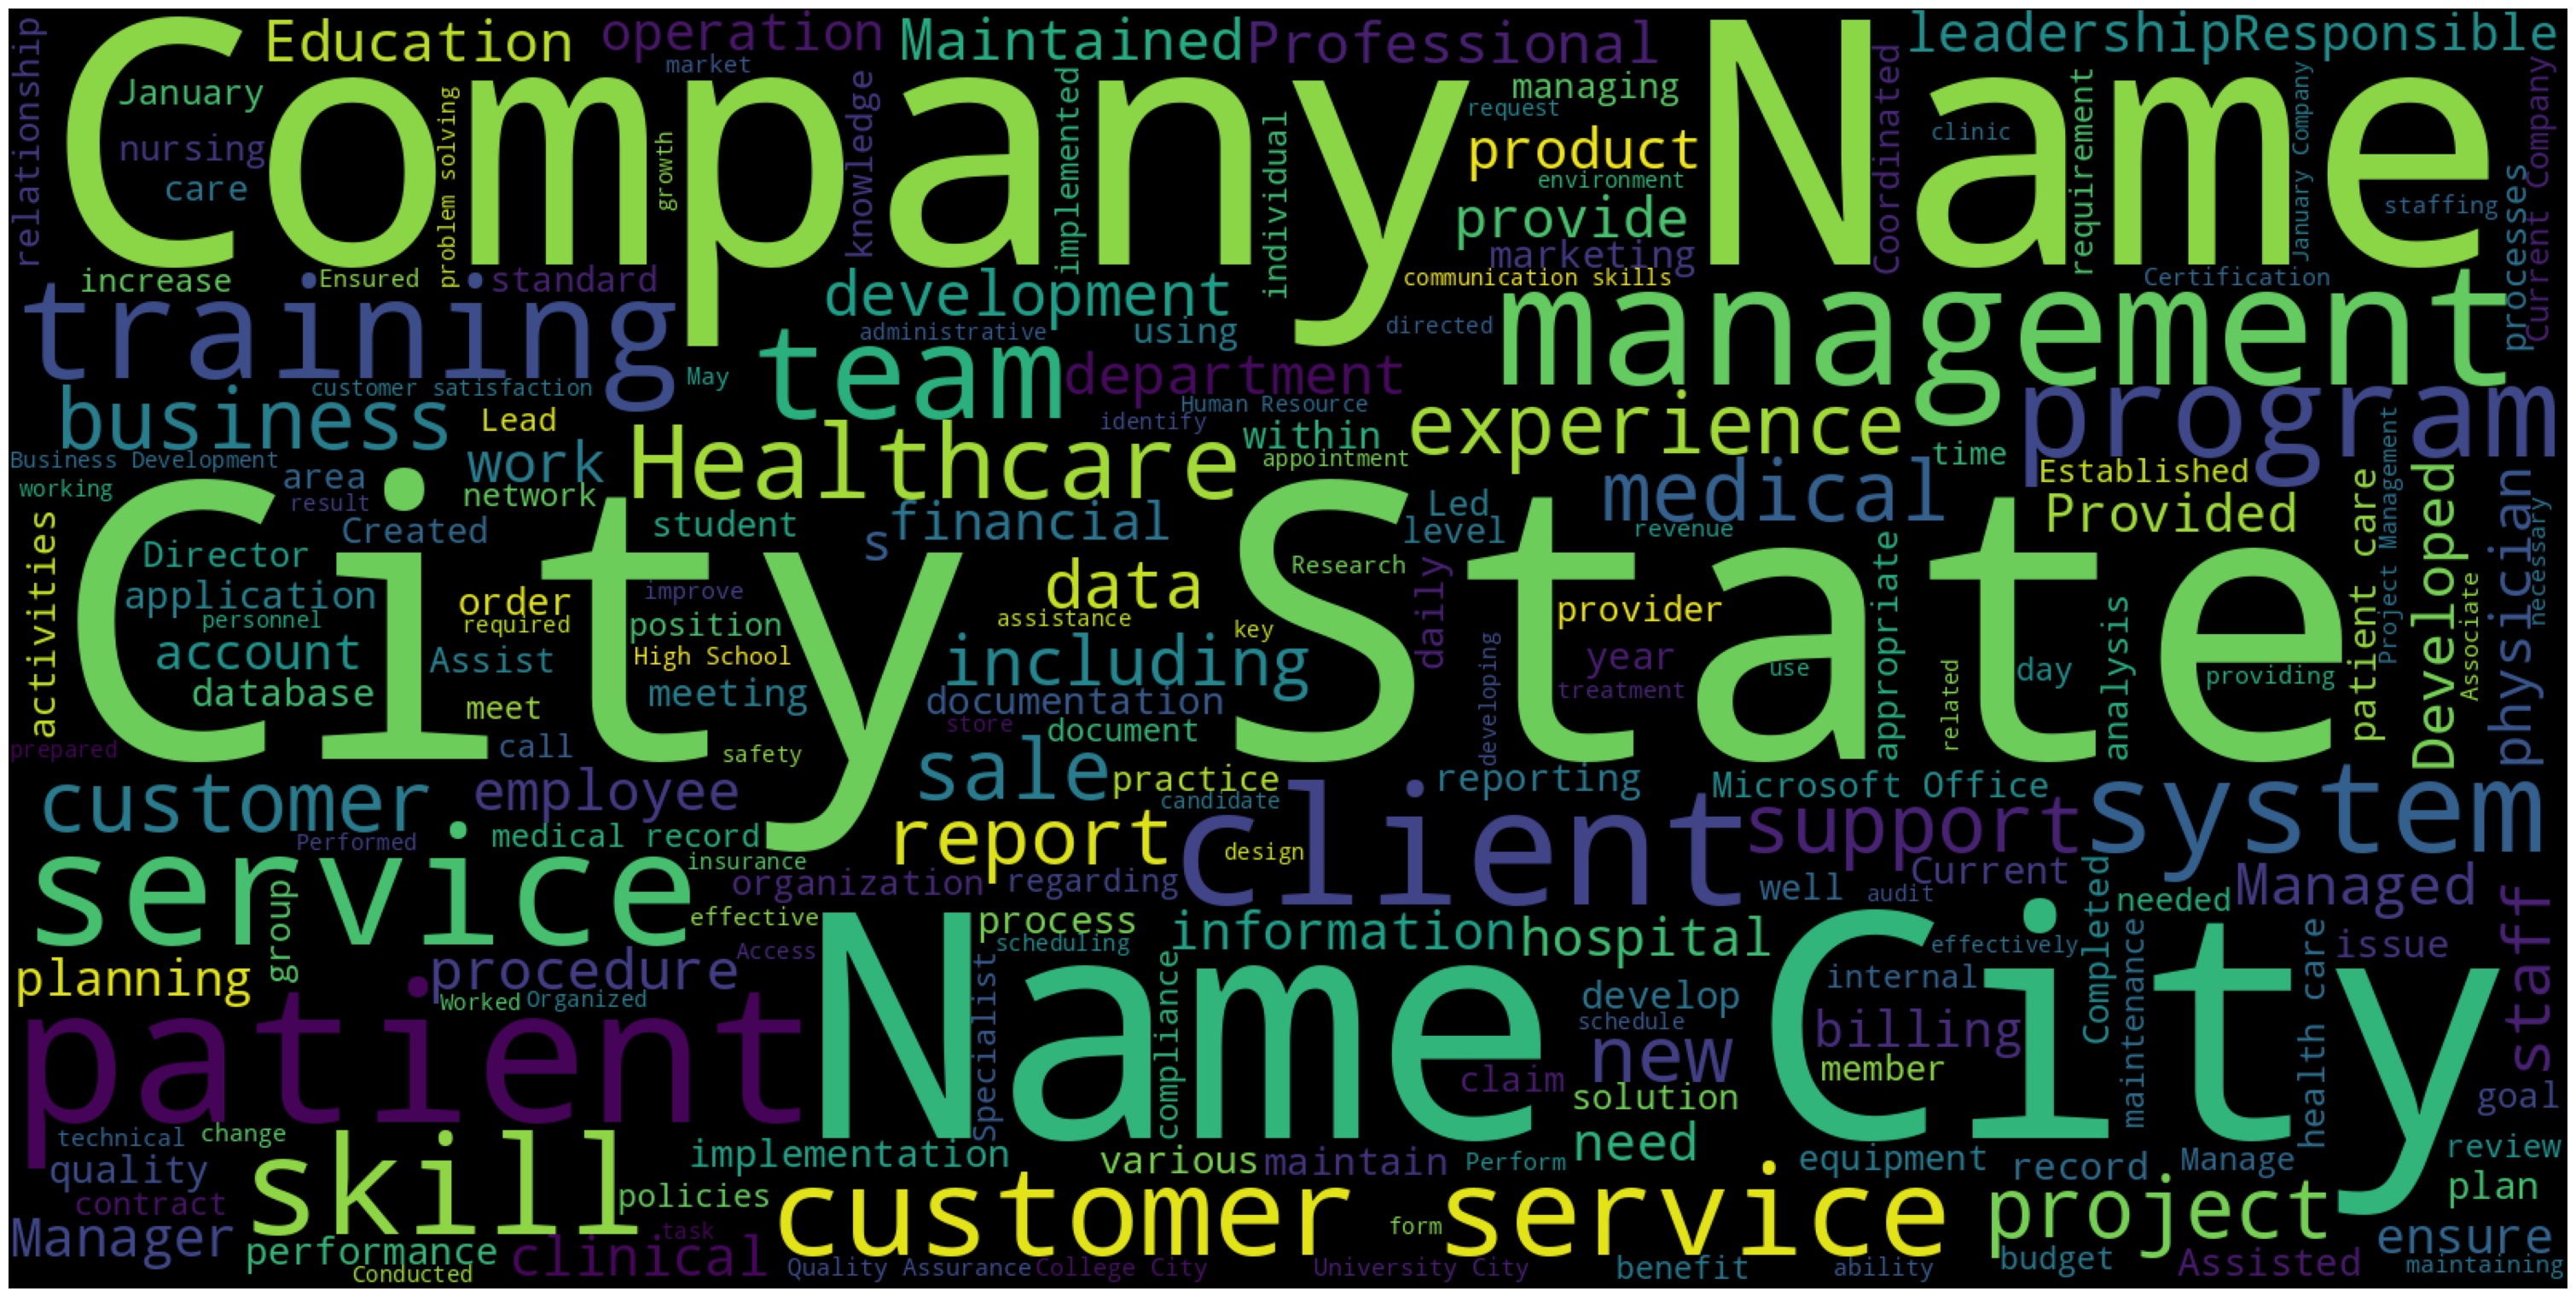

In [ ]:
wordcloud(cleanedSentences)

In [ ]:
features, label = get_festures_Labels(df)

══════════════════════════════════════════════════
Get features and labels from data: 
++++++++++++++++++++++++++++++++++++++++++++++++++
Features: 

 PROFESSIONAL HEALTHCARE REPRESENTATIVE Summary Dynamic sales professional delivering documented success in driving product growth through strong sales skills and patient focus Detail oriented while utilizing communication skills that have a direct and personable approach Proficient in handling new product launches from inception to completion in both independent and collaborative work environments Background encompasses almost 15 years of experience in pharmaceutical sales selling to an array of specialties including general practitioners internal medicine family practice endocrinologist rheumatologist neurologist obstetrician gynecologist geriatric medicine orthopedics pulmonologist gastroenterology urology and cardiology Further call points made to hospital accounts local to territory Additional professional experience includes nursing

In [ ]:
train_features, train_labels, test_features, test_labels = spliting_data(df,features, label)
train_feature_sequences, test_feature_sequences, feature_tokenizer = tokenizing()
train_label_sequences, test_label_sequences, label_index = Tokenize_label()
train_feature_padded, test_feature_padded = pad_sequence(train_feature_sequences, test_feature_sequences)
train_feature_padded, test_feature_padded = genetaing_trainig_dataset(train_feature_padded, test_feature_padded)
train_label_sequences, test_label_sequences = genetaing_validation_dataset(train_label_sequences, test_label_sequences)

══════════════════════════════════════════════════
Sliting data In process
++++++++++++++++++++++++++++++++++++++++++++++++++
Sliting data successfully completed
train_features, train_labels, test_features, test_labels suceffuly generated
══════════════════════════════════════════════════
══════════════════════════════════════════════════
Tokenize part has started
++++++++++++++++++++++++++++++++++++++++++++++++++
Tokenize part has completed
══════════════════════════════════════════════════
{'director': 1, 'healthcareconsultant': 2, 'nurse': 3, 'healthcarerecruiter': 4, 'healthcaremarketingspecialist': 5, 'representative': 6, 'senioranalyst': 7, 'healthcare': 8, 'administrator': 9, 'insurancesalesagent': 10, 'healthcareeffectivenessandinformationsetcoordinator': 11, 'supervisor': 12, 'recruiter': 13, 'medicalsupportassistant': 14, 'administrativeassistant': 15, 'salesrepresentative': 16, 'personalassistant': 17, 'intern': 18, 'healthinformationspecialist': 19, 'owner': 20, 'healthserv

In [ ]:
model_building()
model = optimization()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 128)            768000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 200)               25800     
                                                                 
Total params: 1,089,864
Trainable params: 1,089,864
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_compliation(train_feature_padded, test_feature_padded,train_label_sequences, test_label_sequences, model)


══════════════════════════════════════════════════
Model compilation has started
Epoch 1/100
6/6 - 16s - loss: 5.2929 - accuracy: 0.0559 - val_loss: 5.2826 - val_accuracy: 0.0889 - 16s/epoch - 3s/step
Epoch 2/100
6/6 - 7s - loss: 5.2500 - accuracy: 0.1397 - val_loss: 5.2427 - val_accuracy: 0.0222 - 7s/epoch - 1s/step
Epoch 3/100
6/6 - 10s - loss: 5.0889 - accuracy: 0.0447 - val_loss: 5.2040 - val_accuracy: 0.0222 - 10s/epoch - 2s/step
Epoch 4/100
6/6 - 9s - loss: 4.7731 - accuracy: 0.0391 - val_loss: 4.9543 - val_accuracy: 0.0222 - 9s/epoch - 2s/step
Epoch 5/100
6/6 - 8s - loss: 4.5538 - accuracy: 0.0279 - val_loss: 4.8487 - val_accuracy: 0.0222 - 8s/epoch - 1s/step
Epoch 6/100
6/6 - 10s - loss: 4.3777 - accuracy: 0.0670 - val_loss: 4.8556 - val_accuracy: 0.0222 - 10s/epoch - 2s/step
Epoch 7/100
6/6 - 7s - loss: 4.2278 - accuracy: 0.0670 - val_loss: 4.7568 - val_accuracy: 0.0444 - 7s/epoch - 1s/step
Epoch 8/100
6/6 - 10s - loss: 4.0876 - accuracy: 0.1285 - val_loss: 4.7158 - val_accura

══════════════════════════════════════════════════
2/2 [==============================] - 1s 211ms/step - loss: 2.5032 - accuracy: 0.8667
++++++++++++++++++++++++++++++++++++++++++++++++++
Test Score: 2.5031797885894775
Test Accuracy: 0.8666666746139526
══════════════════════════════════════════════════


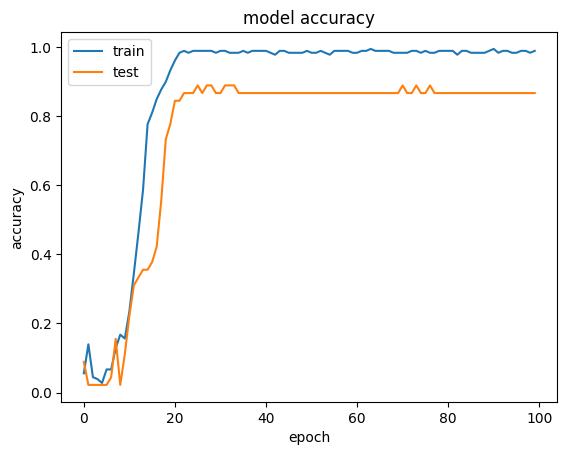

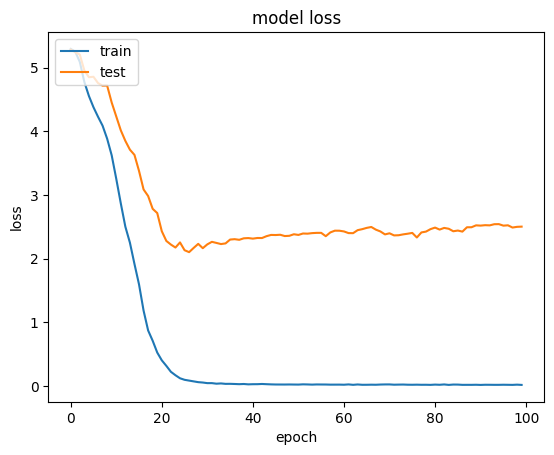

In [ ]:
get_accuracy()
graphs(history)


In [ ]:
pridection()

1/1 [==============================] - 1s 1s/step
++++++++++++++++++++++++++++++++++++++++++++++++++
['healthcarerecruiter', 'staffingcoordinator', 'auditandrecoveryspecialist']


In [ ]:
# Save the trained model
model.save("data/model.h5")

In [ ]:
model1 = tf.keras.models.load_model("data/model.h5")

In [ ]:
to_predict = [test_feature_padded[3],test_feature_padded[8],test_feature_padded[17]]
predictions = model1.predict(np.array(to_predict))
class_labels = np.argmax(predictions, axis=1)
print_add()
keys = [key for i in class_labels for key, value in label_index.items() if i == value]
print(keys)

1/1 [==============================] - 3s 3s/step
++++++++++++++++++++++++++++++++++++++++++++++++++
['healthcarerecruiter', 'staffingcoordinator', 'auditandrecoveryspecialist']


In [ ]:
test_data = pd.read_csv("/content/resumes_indeed_com-job_sample.csv", encoding='latin1')

In [ ]:
test_data.shape

(10, 9)

In [ ]:
test_data.head()

Uniq Id            Crawl Timestamp  \
0  3ddb29e616f31947053b257f327969d7  2019-02-20 08:47:25 +0000   
1  9138476c76bcbbefadedd4862966c3d2  2019-02-20 07:47:48 +0000   
2  cd1cafa706f917a627982bf47291b888  2019-02-20 07:37:41 +0000   
3  53aea69598c6c1084e4bce89f0494bc3  2019-02-20 08:20:06 +0000   
4  90f8f99d66ebc6c09fceee37aff14bc1  2019-02-20 08:35:33 +0000   

                                        Resume Title        Location  \
0  HEALTHCARE DOCUMENTATION SERVICES DELIVERY MAN...  New London, NH   
1  HEALTHCARE ADMINISTRATOR/OPERATIONAL AND STAFF...   Worcester, MA   
2   LICENSED UNITED HEALTHCARE INSURANCE SALES AGENT     Bristol, NH   
3   LICENSED UNITED HEALTHCARE INSURANCE SALES AGENT   Billerica, MA   
4  HEALTHCARE EFFECTIVENESS AND INFORMATION SET C...   Worcester, MA   

                                        Introduction  \
0  A dependable and motivated professional experi...   
1  Experienced, dependable and motivated IT Techn...   
2                                                NaN   
3  To obtain full time employment in the field of...   
4                                                NaN   

                                     Work Experience  \
0  Sales Manager-MadgeTech, Inc-August 2015 to Fe...   
1  Implementation Engineer-Versatile Communicatio...   
2  Education Information Dissemination Coordinato...   
3  Engineering Department Intern-Town of Billeric...   
4  Pack and Ship/SORT Technician-Intel Corporatio...   

                                           Education  \
0  Rowland High School   City  ,   State        H...   
1  --ShoreTel University-Austin, TX|Master-PC & N...   
2     Bachelor's-Management-Regis College-Weston, MA   
3  Bachelor of Science-Civil and Environmental En...   
4  BS-Information Technology-University of Massac...   

                                              Skills  \
0  120 months-CRM,72 months-Contract Negotiation,...   
1  15 months-CISCO,12 months-FIBER OPTIC,6 months...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                              Additional Information  
0  â¢    Well-Developed Sales & Business Acumen ...  
1  TECHNICAL SKILLS\n\nHardware: Switches, Router...  
2                                                NaN  
3  â¢ Bachelors of Science in Civil and Environm...  
4  Engineering Technician/Planning Analyst/Operat...

In [ ]:
test_data = test_data.drop(test_data.columns[:2], axis=1)
test_data = test_data.drop(test_data.columns[7:], axis=1)
test_data['merged_col'] = test_data.iloc[:, 1:7].apply(lambda x: "\n".join(x.dropna().astype(str)), axis=1)

In [ ]:
test_data.columns

Index(['Resume Title', 'Location', 'Introduction', 'Work Experience',
       'Education', 'Skills', 'Additional Information', 'merged_col'],
      dtype='object')

In [ ]:
test_data.iloc[0,:]

Resume Title              HEALTHCARE DOCUMENTATION SERVICES DELIVERY MAN...
Location                                                     New London, NH
Introduction              A dependable and motivated professional experi...
Work Experience           Sales Manager-MadgeTech, Inc-August 2015 to Fe...
Education                 Rowland High School   City  ,   State        H...
Skills                    120 months-CRM,72 months-Contract Negotiation,...
Additional Information    â¢    Well-Developed Sales & Business Acumen ...
merged_col                New London, NH\nA dependable and motivated pro...
Name: 0, dtype: object

In [ ]:
print(test_data.iloc[0,7])

New London, NH
A dependable and motivated professional experienced in managing multiple projects in a fast paced deadline driven environment. Posses strong organizational and communication skills. Strong technical proficiency that includes: working knowledge of Microsoft Office Word, Excel, Access and Outlook with the ability to quickly learn new technology and software applications. Works well independently with the ability to prioritize and multi-task efficiently with minimal  supervision
Sales Manager-MadgeTech, Inc-August 2015 to February 2017-Warner, NH-â¢       Built and Directed inside sales team offering solution-based data logging hardware, software, and services to customers across multiple vertical markets

â¢       Directed personnel in support of global channel partner network

â¢       15% Sales Growth from 2015 to 2017: $8.5M to $9.7M (Combined channel and direct)

â¢       Managed expansive product portfolio

â¢       Developed, implemented, and tracked strategic s

In [ ]:
new_test = test_data.loc[:,['Resume Title', 'merged_col']]

In [ ]:
new_test.head()

Resume Title  \
0  HEALTHCARE DOCUMENTATION SERVICES DELIVERY MAN...   
1  HEALTHCARE ADMINISTRATOR/OPERATIONAL AND STAFF...   
2   LICENSED UNITED HEALTHCARE INSURANCE SALES AGENT   
3   LICENSED UNITED HEALTHCARE INSURANCE SALES AGENT   
4  HEALTHCARE EFFECTIVENESS AND INFORMATION SET C...   

                                          merged_col  
0  New London, NH\nA dependable and motivated pro...  
1  Worcester, MA\nExperienced, dependable and mot...  
2  Bristol, NH\nEducation Information Disseminati...  
3  Billerica, MA\nTo obtain full time employment ...  
4  Worcester, MA\nPack and Ship/SORT Technician-I...

In [ ]:
new_test['cleaned_resume'] = new_test.merged_col.apply(lambda x: cleanResume(x))
new_test.head()

Resume Title  \
0  HEALTHCARE DOCUMENTATION SERVICES DELIVERY MAN...   
1  HEALTHCARE ADMINISTRATOR/OPERATIONAL AND STAFF...   
2   LICENSED UNITED HEALTHCARE INSURANCE SALES AGENT   
3   LICENSED UNITED HEALTHCARE INSURANCE SALES AGENT   
4  HEALTHCARE EFFECTIVENESS AND INFORMATION SET C...   

                                          merged_col  \
0  New London, NH\nA dependable and motivated pro...   
1  Worcester, MA\nExperienced, dependable and mot...   
2  Bristol, NH\nEducation Information Disseminati...   
3  Billerica, MA\nTo obtain full time employment ...   
4  Worcester, MA\nPack and Ship/SORT Technician-I...   

                                      cleaned_resume  
0  New London NH A dependable and motivated profe...  
1  Worcester MA Experienced dependable and motiva...  
2  Bristol NH Education Information Dissemination...  
3  Billerica MA To obtain full time employment in...  
4  Worcester MA Pack and Ship SORT Technician Int...

In [ ]:
cleaned_sent, word_freq = mostcommon_words(new_test)

══════════════════════════════════════════════════
++++++++++++++++++++++++++++++++++++++++++++++++++
Most common words: 

[('months', 43), ('MA', 25), ('management', 23), ('NH', 22), ('customer', 20), ('new', 19), ('January', 19), ('support', 16), ('Engineering', 16), ('customers', 15), ('Management', 15), ('business', 15), ('software', 14), ('sales', 14), ('marketing', 14), ('test', 14), ('Manager', 13), ('2015', 13), ('development', 13), ('service', 13), ('communication', 12), ('Office', 12), ('data', 12), ('process', 12), ('June', 12), ('2013', 12), ('Maintained', 12), ('team', 11), ('Team', 11), ('Created', 11), ('IT', 11), ('Systems', 11), ('including', 11), ('using', 11), ('skills', 10), ('Sales', 10), ('product', 10), ('monthly', 10), ('2011', 10), ('2016', 10), ('plan', 10), ('May', 10), ('24', 10), ('2017', 9), ('Provided', 9), ('Technical', 9), ('Performed', 9), ('Corporation', 9), ('School', 9), ('Technician', 9)]
++++++++++++++++++++++++++++++++++++++++++++++++++


In [ ]:
new_test.rename(columns={'Resume Title': 'Category'}, inplace = True)

══════════════════════════════════════════════════
Visulization of most common word: 
══════════════════════════════════════════════════


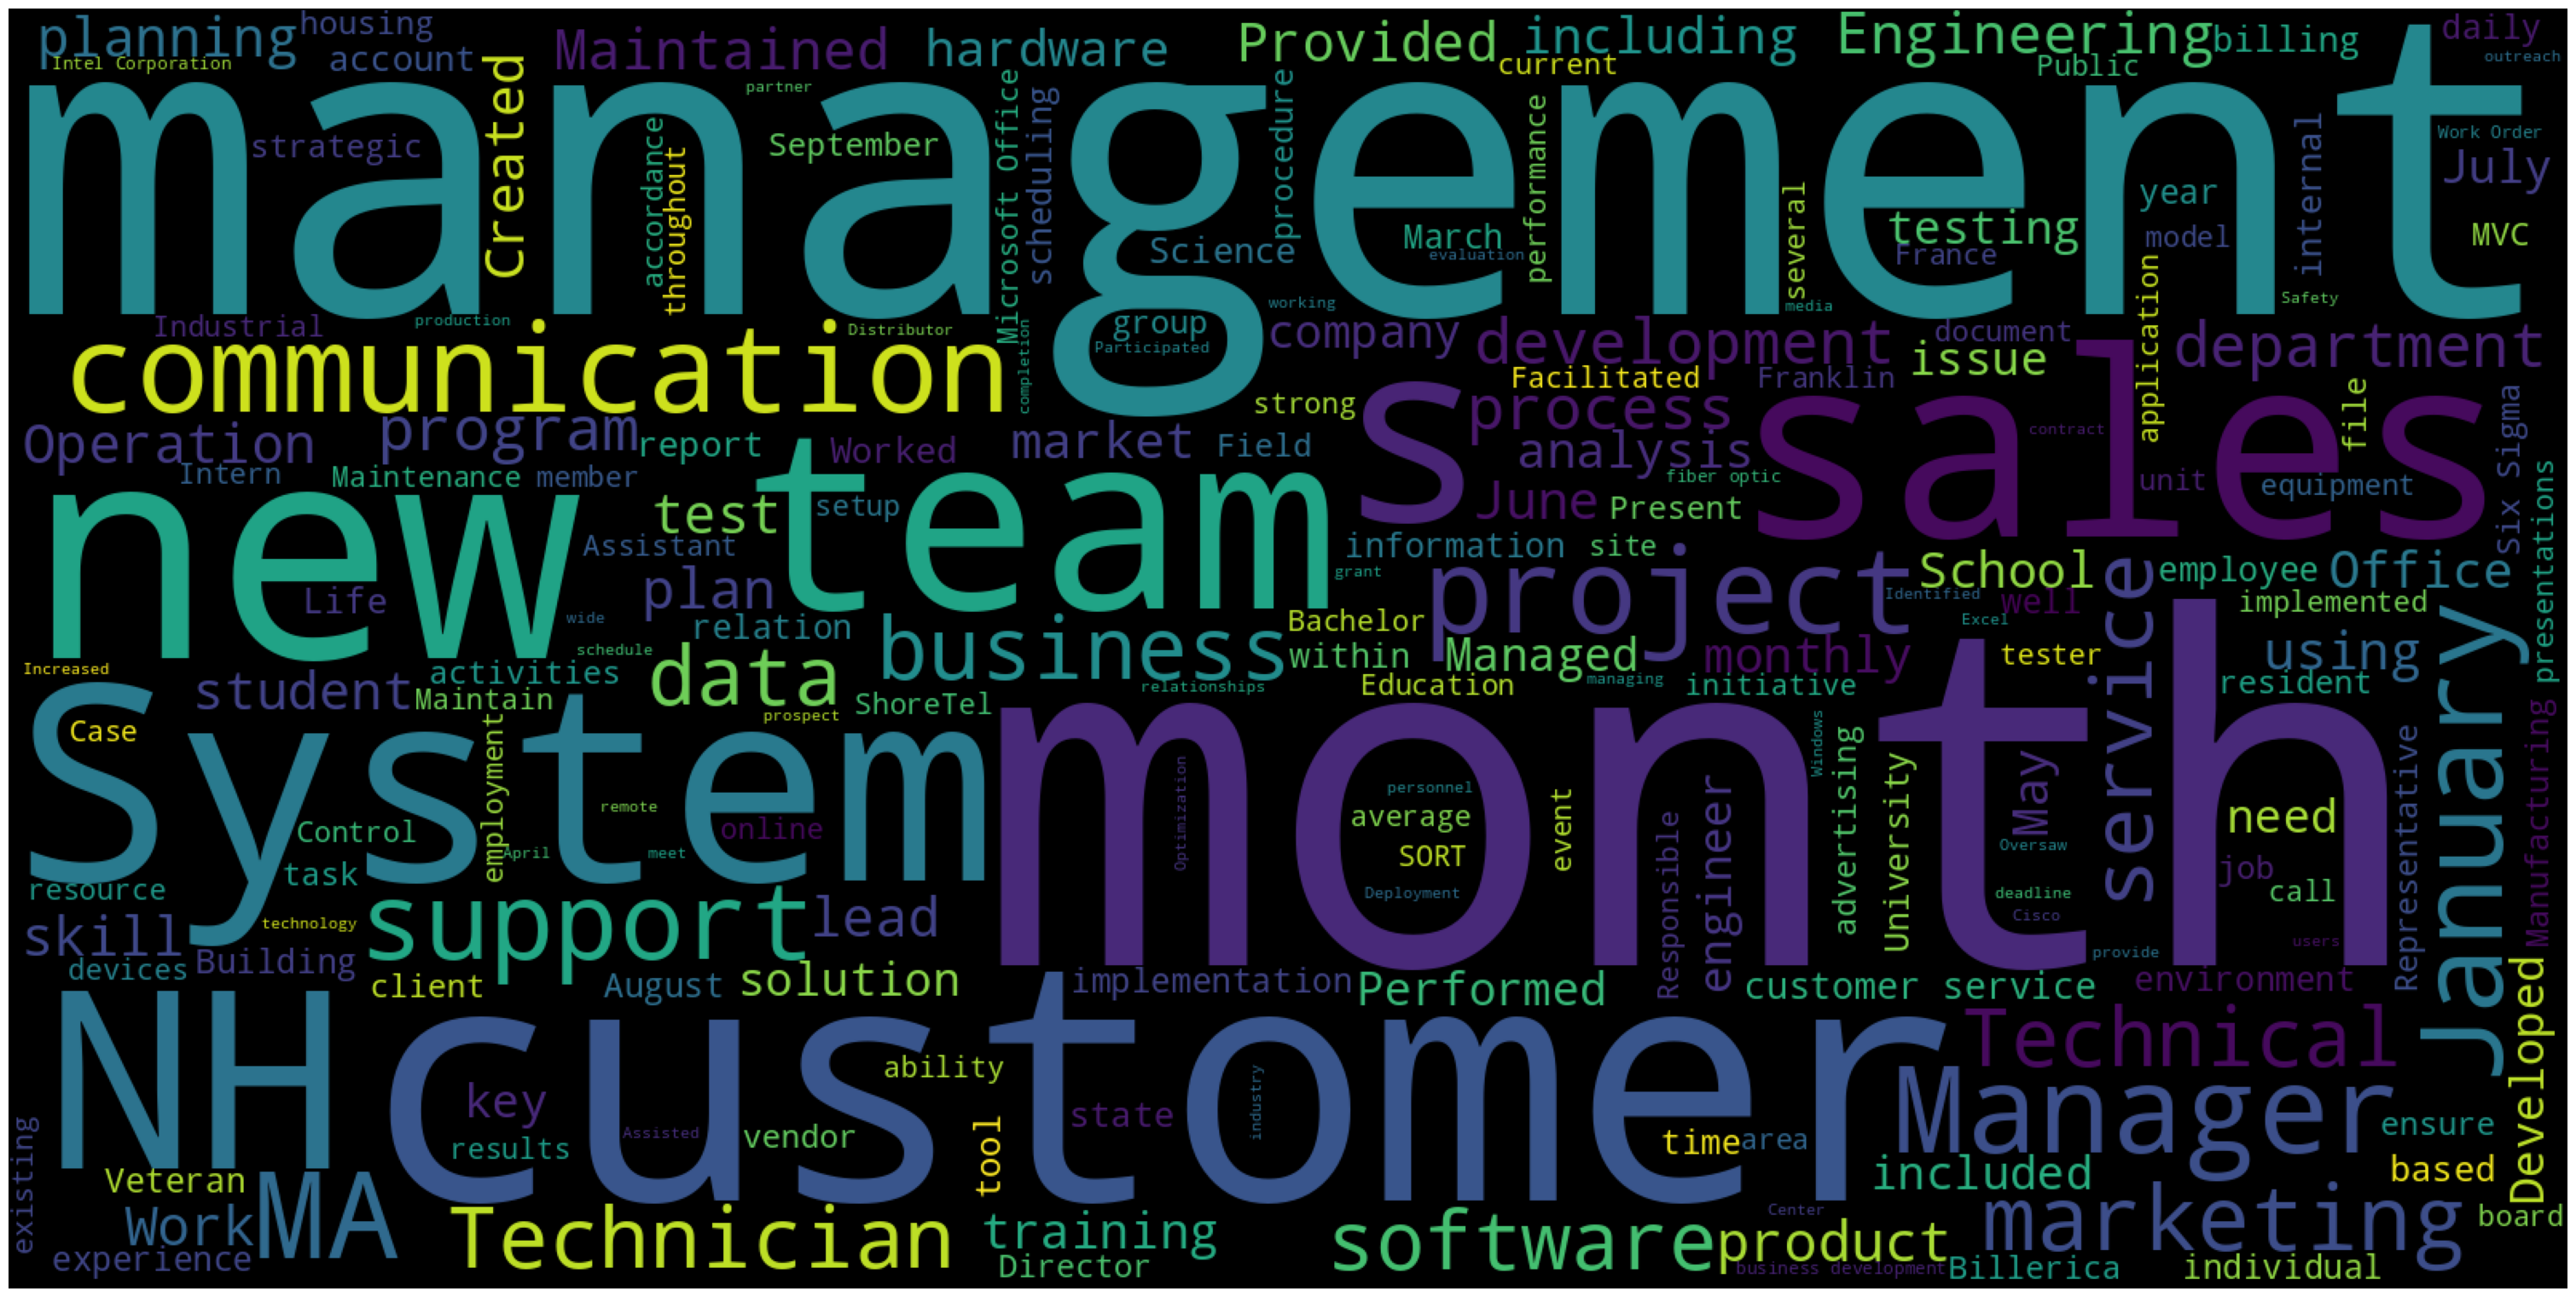

In [ ]:
wordcloud(cleaned_sent)

In [ ]:
features, label = get_festures_Labels(new_test)

══════════════════════════════════════════════════
Get features and labels from data: 
++++++++++++++++++++++++++++++++++++++++++++++++++
Features: 

Allenstown NH To utilize experience and personal skills in the areas of communications customer service relations and advertising marketing Classified Ads Manager Quality of Life Publications The Hippo York Independent July 2009 to June 2010 Manchester NH As a representative my duties were not exclusive to cold calling sales and marketing Daily activities revolved around client relations and supporting both the needs of small and large businesses in the Manchester and York communities Additional tasks were handling billing solutions for both current and new clients reception updating the existing database and assisting with the layout and visual dimensions for the newspaper Dealing with deadlines and quotas were a weekly ritual and with those pressures I was able to work in a team environment to consistently meet all my obligations Admiss

In [ ]:
test_features, test_labels = features, label

In [ ]:
test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)

In [ ]:
max_length = 300
trunc_type = 'post'
pad_type = 'post'

test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = np.array(test_feature_padded)


In [ ]:
predictions = model.predict(test_feature_padded)

1/1 [==============================] - 3s 3s/step


In [ ]:
class_labels = np.argmax(predictions, axis=1)

In [ ]:
keys = [key for i in class_labels for key, value in label_index.items() if i == value]

In [ ]:
len(keys)

10

In [ ]:
new_test.head()

Category  \
0     healthcaredocumentationservicesdeliverymanager   
1   healthcareadministrator/operationalandstaffreorg   
2        licensedunitedhealthcareinsurancesalesagent   
3        licensedunitedhealthcareinsurancesalesagent   
4  healthcareeffectivenessandinformationsetcoordi...   

                                          merged_col  \
0  New London, NH\nA dependable and motivated pro...   
1  Worcester, MA\nExperienced, dependable and mot...   
2  Bristol, NH\nEducation Information Disseminati...   
3  Billerica, MA\nTo obtain full time employment ...   
4  Worcester, MA\nPack and Ship/SORT Technician-I...   

                                      cleaned_resume  
0  New London NH A dependable and motivated profe...  
1  Worcester MA Experienced dependable and motiva...  
2  Bristol NH Education Information Dissemination...  
3  Billerica MA To obtain full time employment in...  
4  Worcester MA Pack and Ship SORT Technician Int...

In [ ]:
new_test["prediction"] = keys

In [ ]:
new_test.head(25)

Category  \
0     healthcaredocumentationservicesdeliverymanager   
1   healthcareadministrator/operationalandstaffreorg   
2        licensedunitedhealthcareinsurancesalesagent   
3        licensedunitedhealthcareinsurancesalesagent   
4  healthcareeffectivenessandinformationsetcoordi...   
5  healthcareeffectivenessandinformationsetcoordi...   
6            systemadministrator/assistantsupervisor   
7               emergencyroomqualityassurancemanager   
8              senioranalystdataqualityandgovernance   
9       electronichealthrecordoptimizationspecialist   

                                          merged_col  \
0  New London, NH\nA dependable and motivated pro...   
1  Worcester, MA\nExperienced, dependable and mot...   
2  Bristol, NH\nEducation Information Disseminati...   
3  Billerica, MA\nTo obtain full time employment ...   
4  Worcester, MA\nPack and Ship/SORT Technician-I...   
5  Springfield, MA\nBDC Data Analyst-Gary Rome Au...   
6  Boston, MA\nSafety Engineer Intern-Hexagon Man...   
7  Allenstown, NH\nTo utilize experience and pers...   
8  Pembroke, NH\nASSISTANT PROGRAM MANAGER-HARBOR...   
9  Plymouth, MA\nHigh energy, hardworking Enginee...   

                                      cleaned_resume  \
0  New London NH A dependable and motivated profe...   
1  Worcester MA Experienced dependable and motiva...   
2  Bristol NH Education Information Dissemination...   
3  Billerica MA To obtain full time employment in...   
4  Worcester MA Pack and Ship SORT Technician Int...   
5  Springfield MA BDC Data Analyst Gary Rome Auto...   
6  Boston MA Safety Engineer Intern Hexagon Manuf...   
7  Allenstown NH To utilize experience and person...   
8  Pembroke NH ASSISTANT PROGRAM MANAGER HARBOR H...   
9  Plymouth MA High energy hardworking Engineerin...   

                                       prediction  
0         healthcarecustomerservicerepresentative  
1         healthcarecustomerservicerepresentative  
2                                        director  
3                                        engineer  
4                                        engineer  
5                                      supervisor  
6                           nationaladministrator  
7                                        director  
8                     clinicalresearchcoordinator  
9  healthcaredocumentationservicesdeliverymanager